# K562
# Pipeline to Extract and Analyze mC profiles from BAM files and look at Forward & Reverse strands

Modify the window of the input size

In [1]:
import sys
from pathlib import Path
from datetime import datetime

# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated
    # main,
)

modkit found with expected version 0.2.4


In [2]:
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline

## Extract Extranded window around the 30 bp ROI of unedited primary T cells from Elain ES from nCATs nanopore experiment using P2 on 2004-12-16

## Setting mC threshold in methylation calling confidance to 0.7

# Expend window size

In [3]:
system_info()

experiment_name = "K562_ZFPOFFpostSort_LOW70_Thr0.7_NoFullyUnmethylated"
threshold_mC =  0.7 #  0.9 #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
#  "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')

ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
region_chr = 'chr1'

# region_start = 206586162
# region_end = 206586192

# Expend window size
expand_window_size = 50 # 500 #500 #1500 # 0 
expand_window_size
print("Expend window size by 2 * ", expand_window_size)
region_start = 206586162 - expand_window_size
region_end = 206586192 + expand_window_size + 1

region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
region_length = region_end - region_start
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)

print('region_chr', region_chr)
print('region_start', region_start)
print('region_end', region_end)
print(f'{region_chr}:{region_start}-{region_end}')

System: Linux
Release: 6.8.0-52-generic
Version: #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
Expend window size by 2 *  50
region_length 131
CCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATT
131
region_chr chr1
region_start 206586112
region_end 206586243
chr1:206586112-206586243


No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v1_1_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_c…

          |    0%

          | Transferring 3530 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3530   0% | 00:00<…

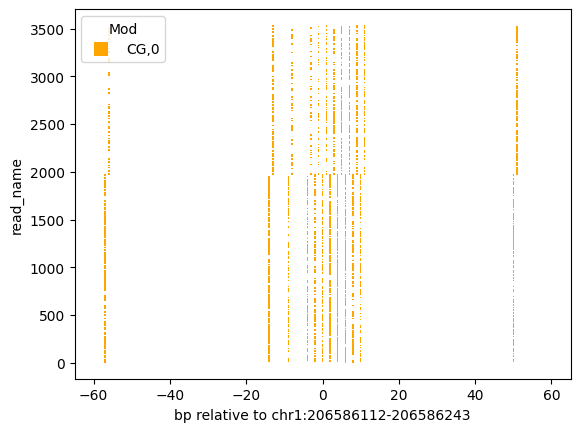

In [4]:
extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

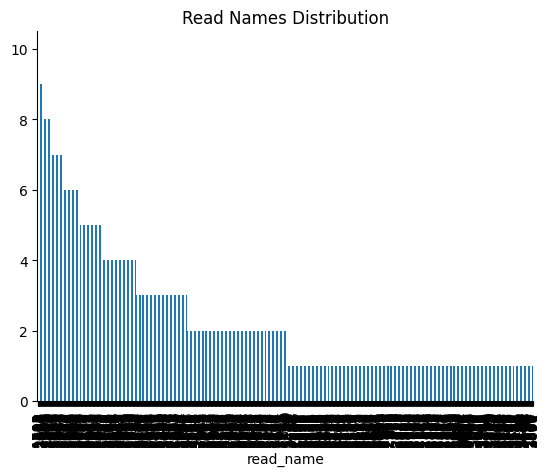

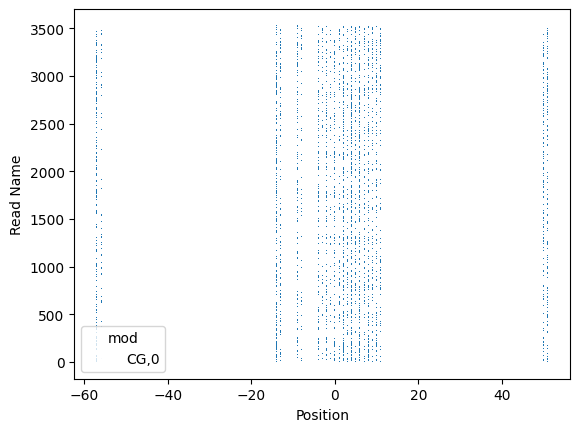

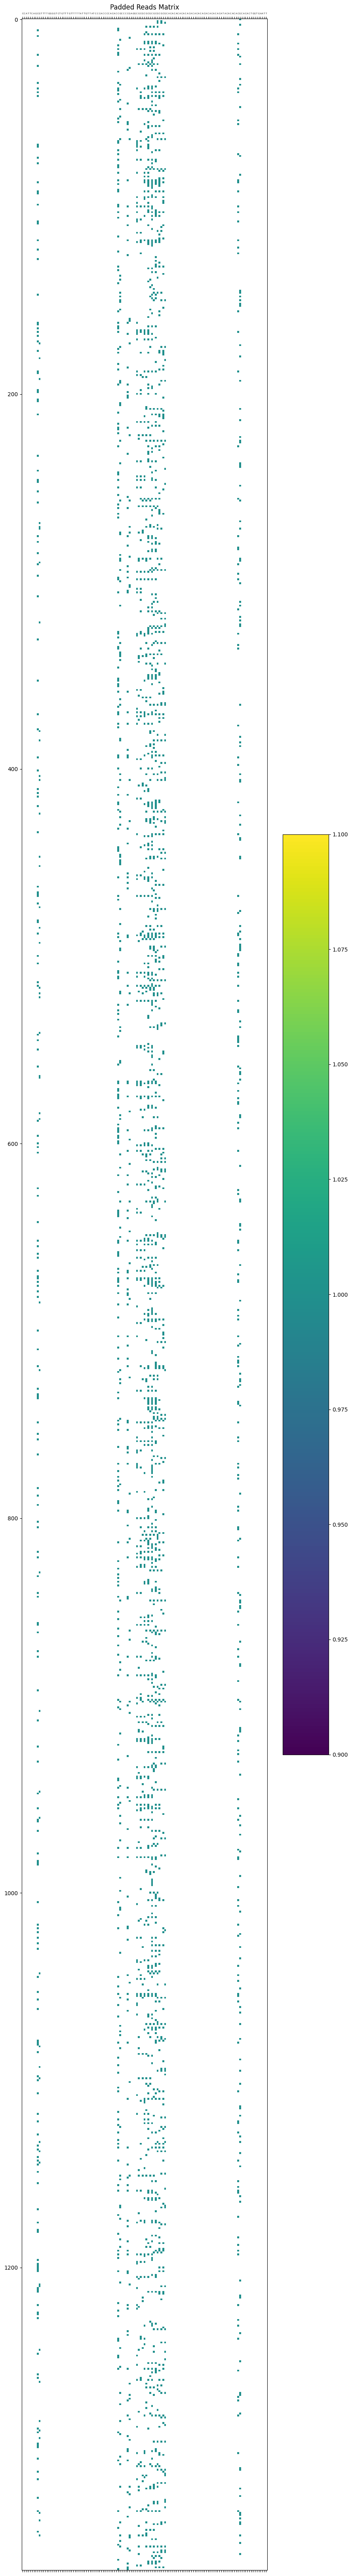

Padded reads saved to padded_reads_K562_ZFPOFFpostSort_LOW70_Thr0.7_NoFullyUnmethylated_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy


In [5]:
keep_unmethylated_reads = False

if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

# if extract_file:
#     reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
#     visualize_data(reads_df)

#     padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
#     if padded_reads is not None:
#         plot_padded_reads(padded_reads, ref_seq_list)
#         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)
 

Padded reads loaded successfully.


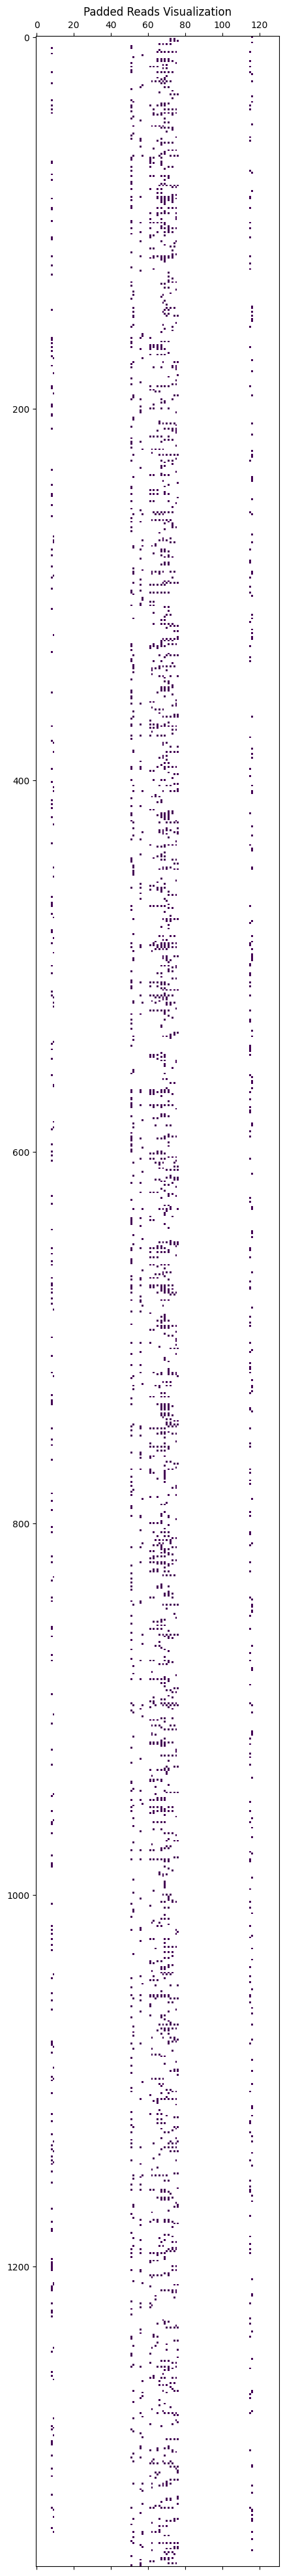

Visualization completed.
Region length: 131
CCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [8, 51, 56, 61, 63, 65, 67, 69, 71, 73, 75, 115]
Forward reads: 903
Reverse reads: 459
DataFrame shape: (1362, 131)
         C    C    A    T    T    C    A    G      C     G  ...    C    T  \
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  192.0  49.0  ...  0.0  0.0   
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    0.0   0.0  ...  NaN  NaN   
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
max    Na

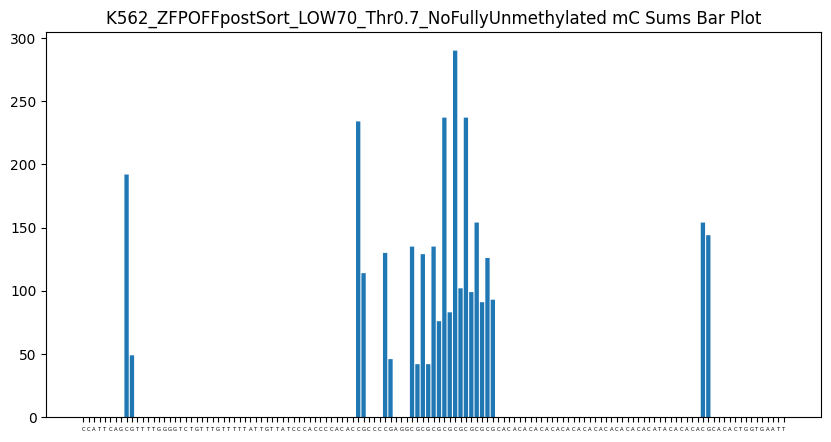

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.14096916 0.03597651 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.17180617 0.08370044 0.
 0.         0.         0.09544787 0.03377386 0.         0.
 0.         0.09911894 0.030837   0.09471366 0.030837   0.09911894
 0.05580029 0.17400881 0.06093979 0.21292217 0.07488987 0.17400881
 0.07268722 0.11306902 0.06681351 0.09251101 0.06828194 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.

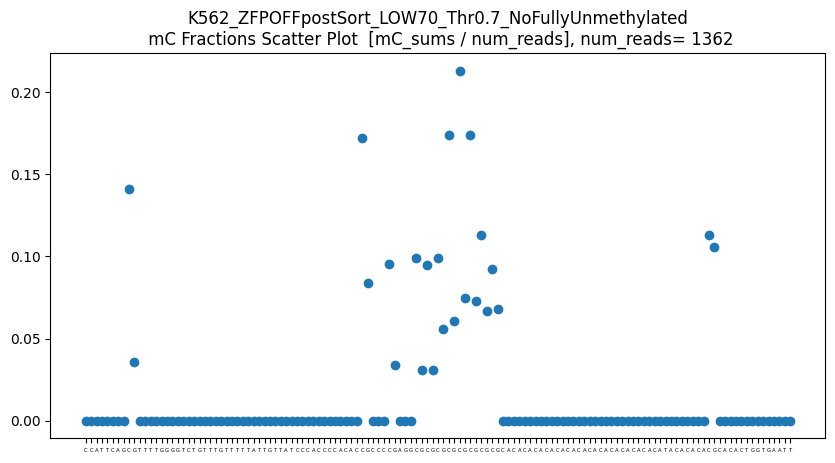

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums  = [241. 348. 176. 177. 171. 211. 320. 392. 336. 245. 219. 298.]


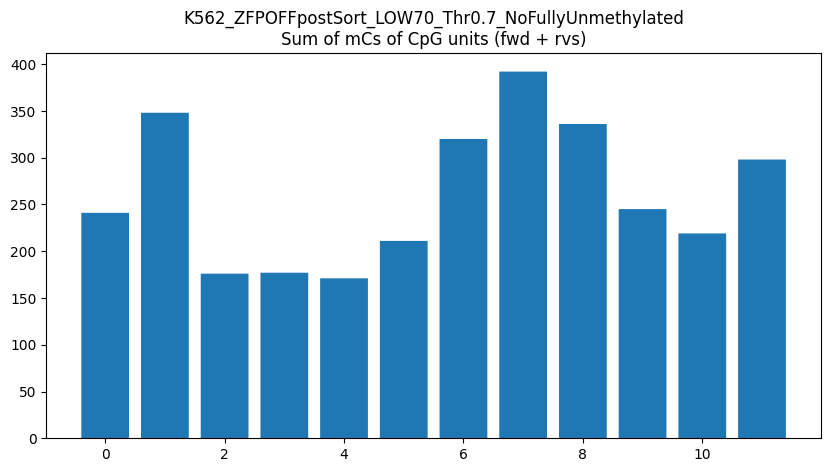

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums / len(CGs_all) = [0.17694567 0.25550661 0.12922173 0.12995595 0.12555066 0.15491924
 0.2349486  0.28781204 0.24669604 0.17988253 0.16079295 0.21879589]


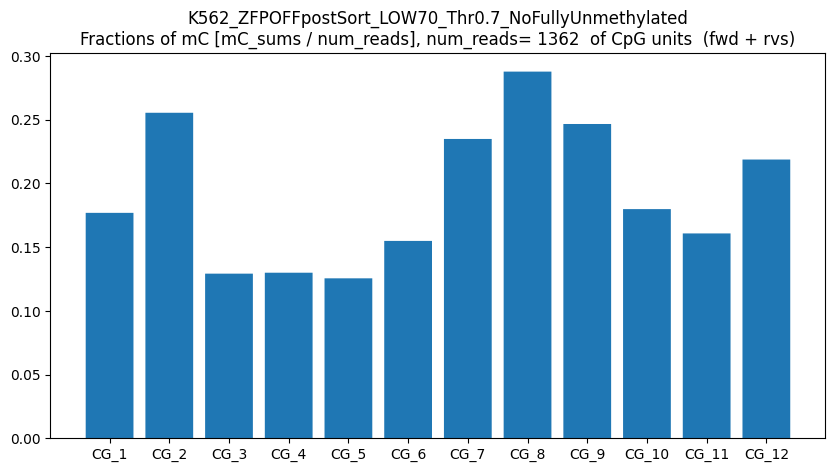

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_on_fwd_C_sums = [  0.   0.   0.   0.   0.   0.   0.   0. 241.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 348.   0.   0.   0.   0.
 176.   0.   0.   0.   0. 177.   0. 171.   0. 211.   0. 320.   0. 392.
   0. 336.   0. 245.   0. 219.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 298.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.]


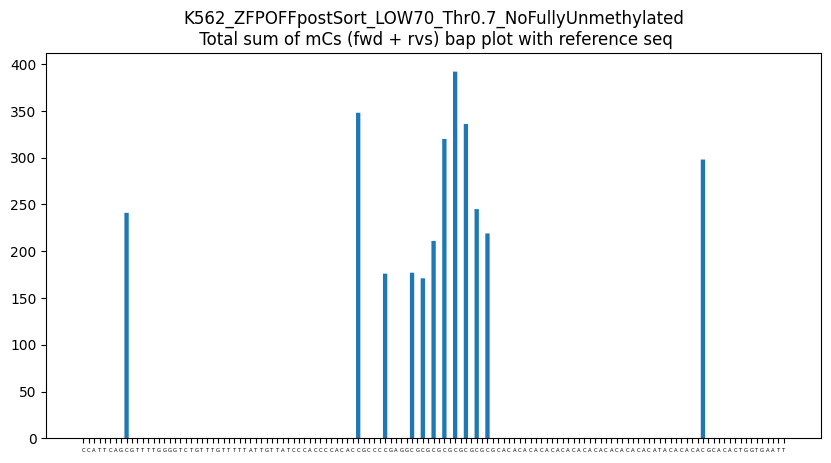

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


len(CGs_all) = 1362
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.17694567 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.25550661 0.         0.
 0.         0.         0.12922173 0.         0.         0.
 0.         0.12995595 0.         0.12555066 0.         0.15491924
 0.         0.2349486  0.         0.28781204 0.         0.24669604
 0.         0.17988253 0.         0.16079295 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

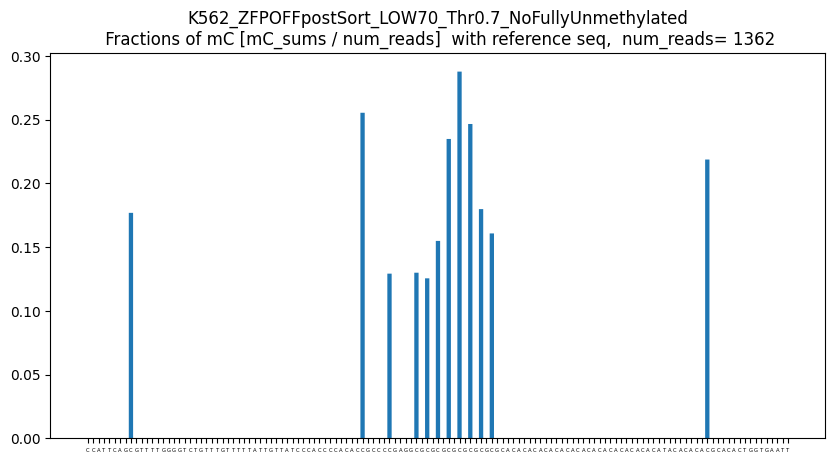

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



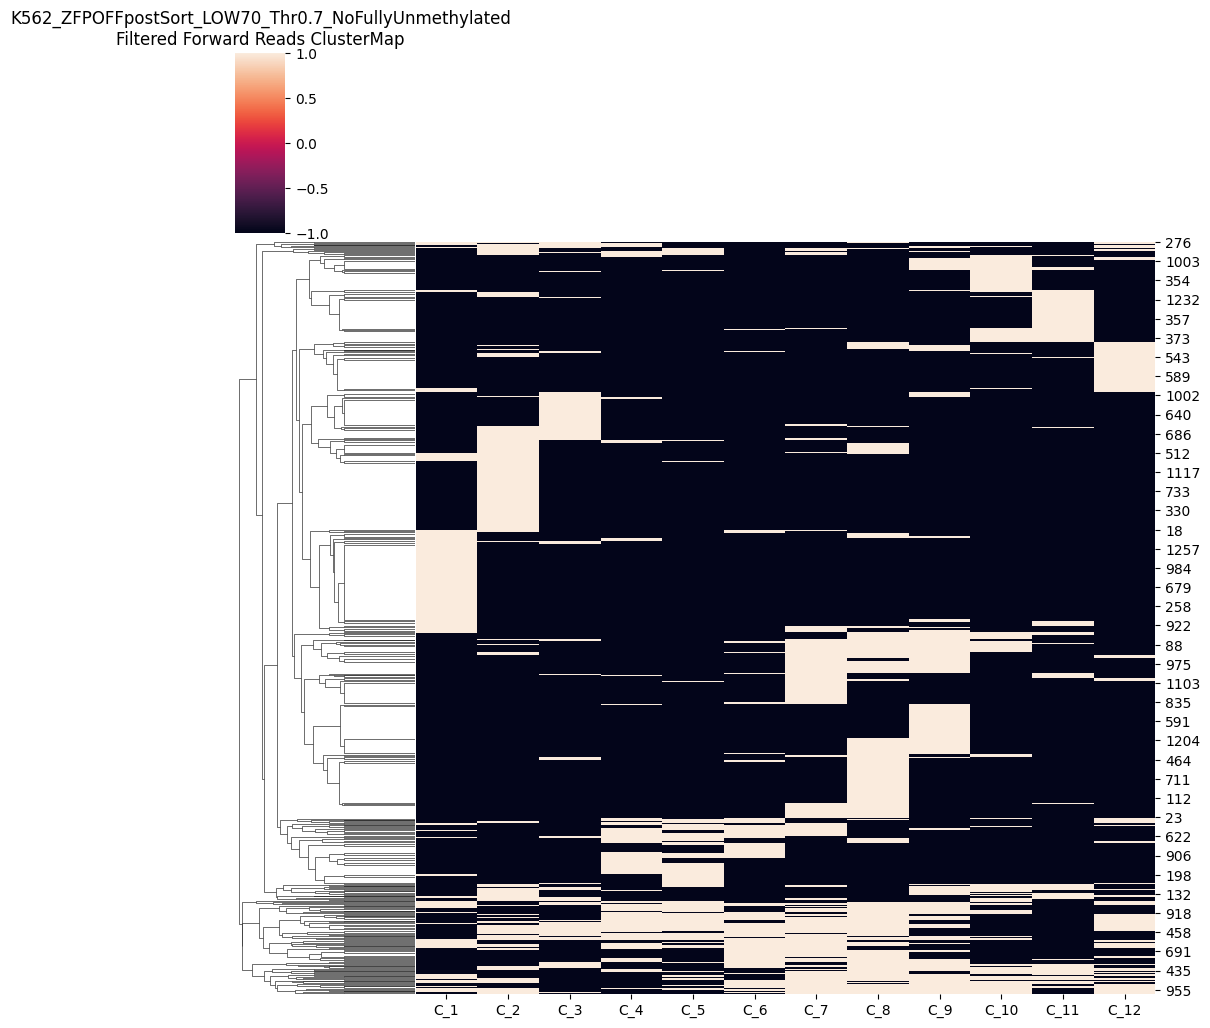

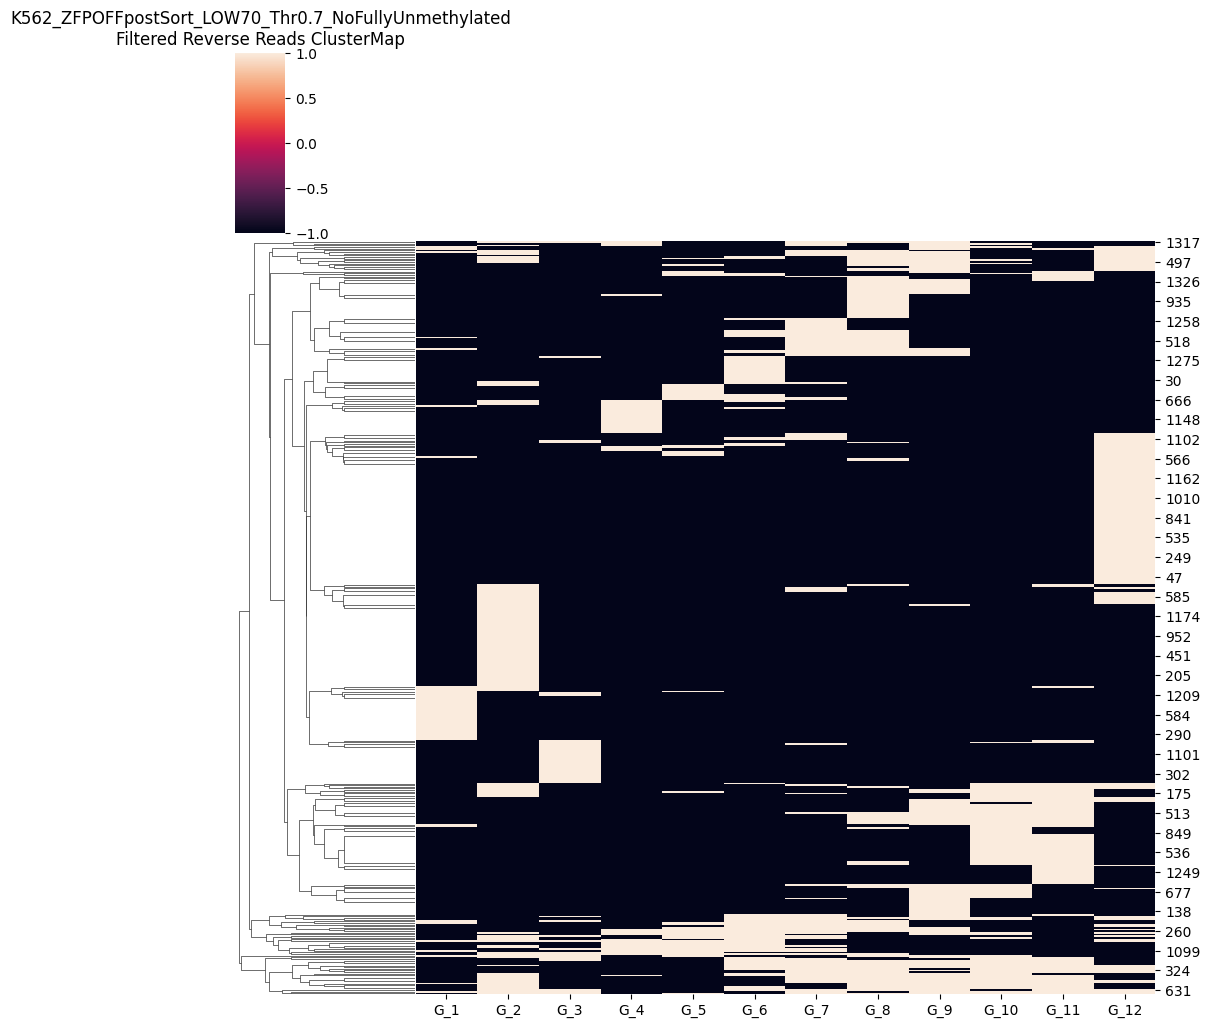

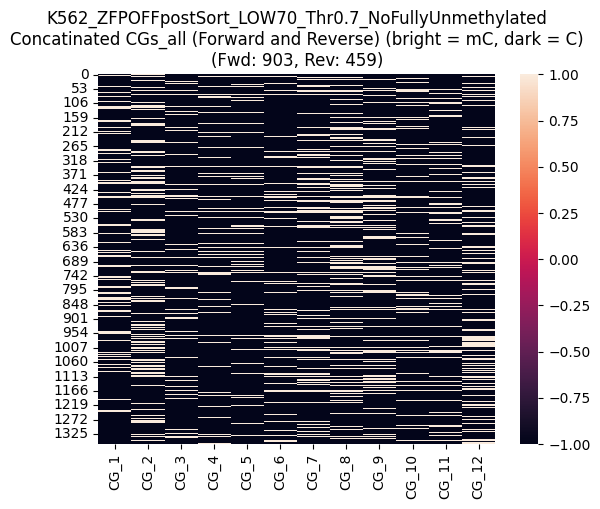

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



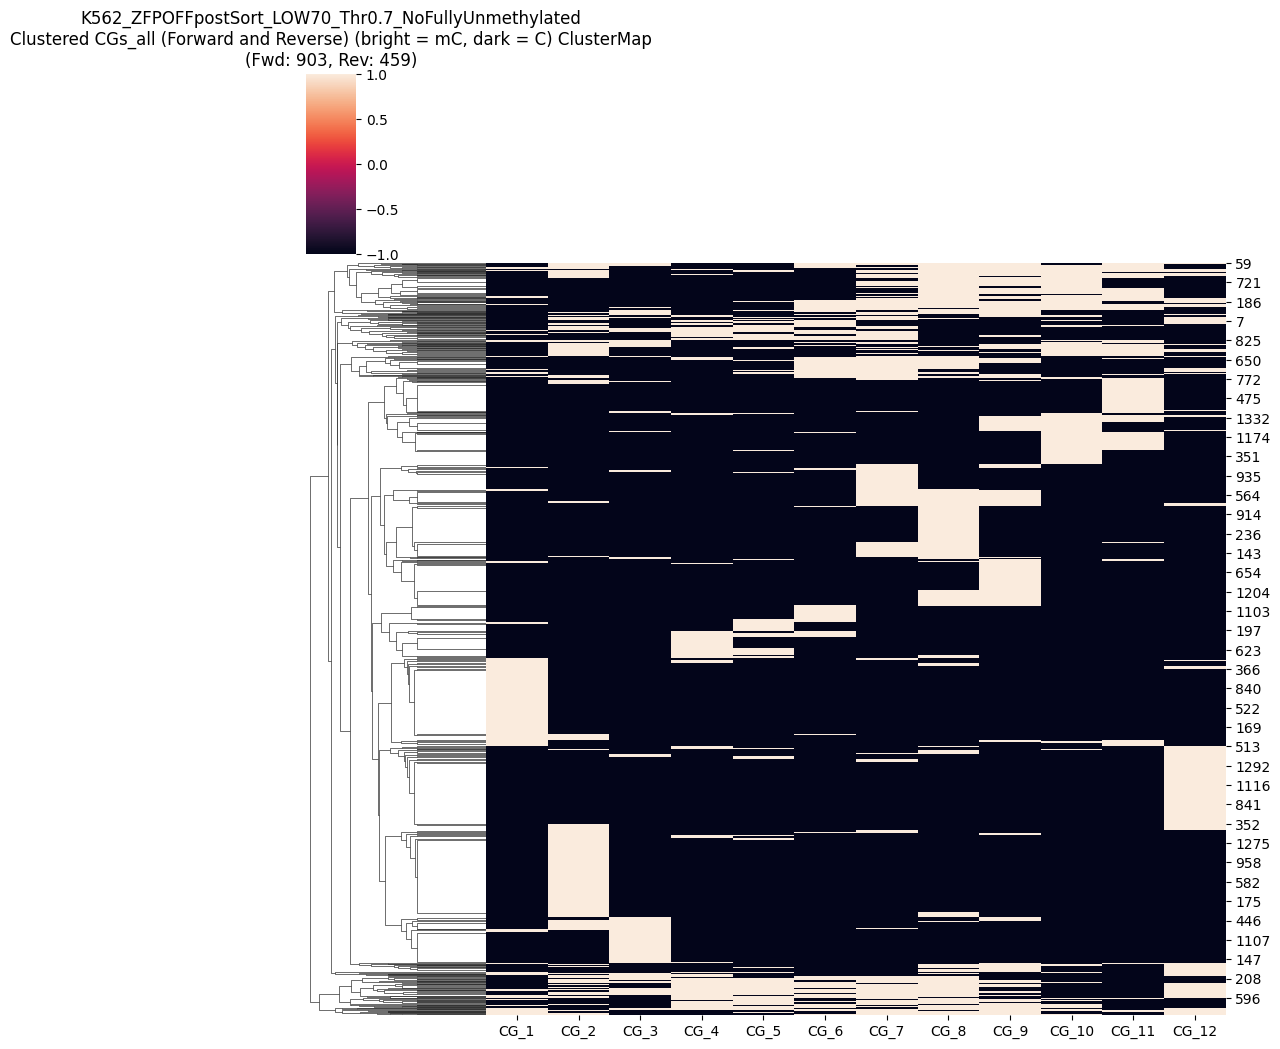

CGs_all saved as CG_12_units_combined_K562_ZFPOFFpostSort_LOW70_Thr0.7_NoFullyUnmethylated_numFWD903_numRVS459_padded_reads_K562_ZFPOFFpostSort_LOW70_Thr0.7_NoFullyUnmethylated_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [6]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### Results for ROI Extraction from Unedited cells:
From around 3000 reads located near the ROI, 

only ~1700 reads have non-zery mC

(with 70% confidance at least one methylated C  in the mC call) 

Forward reads:   

Reverse reads: 

# Analyze the Edited cells from the same cells other sorted part 

System: Linux
Release: 6.8.0-52-generic
Version: #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.7 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v1_1_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_co…

          |    0%

          | Transferring 2638 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2638   0% | 00:00<…

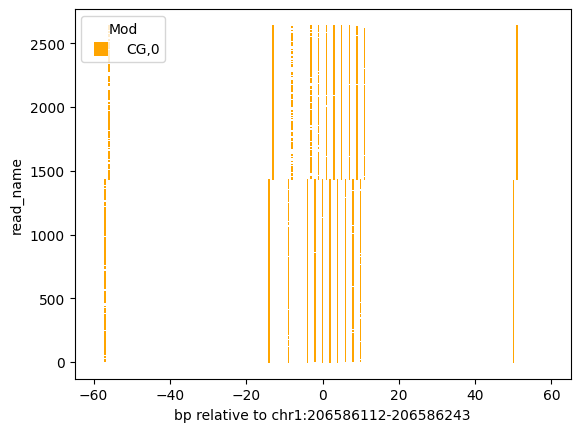

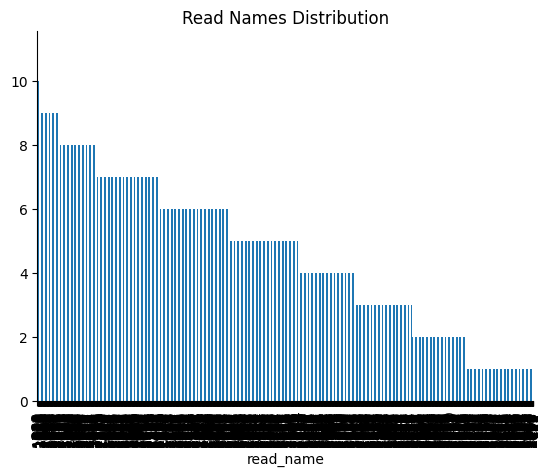

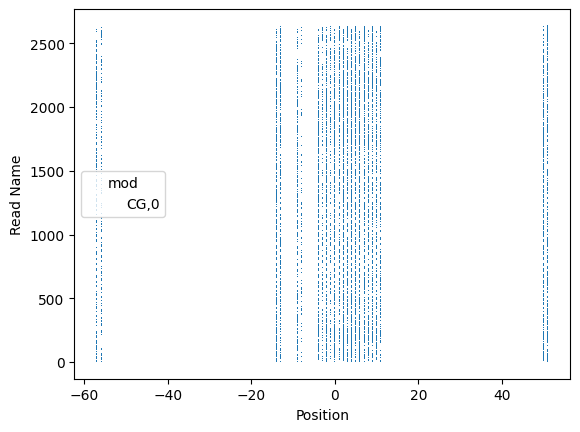

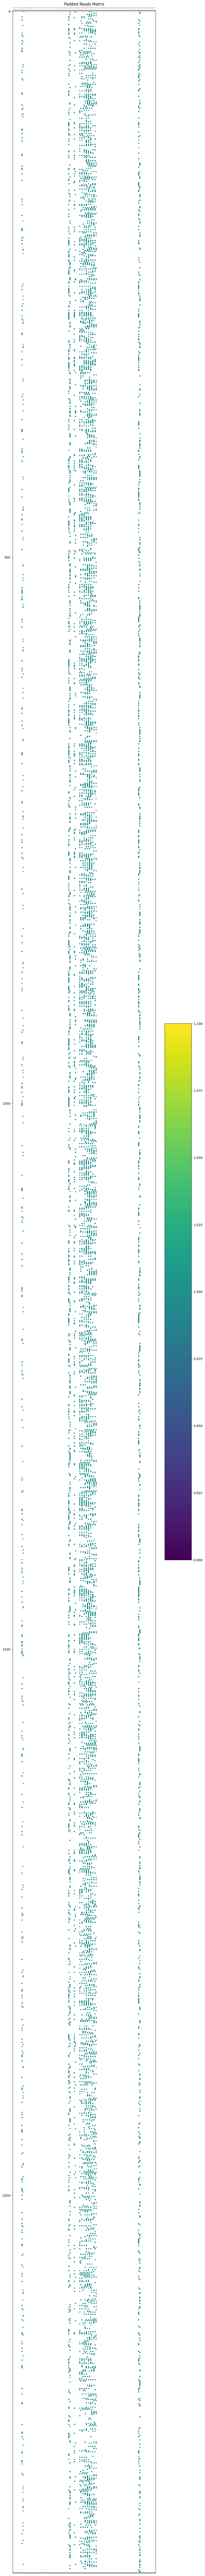

Padded reads saved to padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.7_NoFullyUnmethylated_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy


In [ ]:
system_info()

experiment_name = "K562_ZFPOFFpostSort_HIGH_Thr0.7_NoFullyUnmethylated"
# threshold_mC = 0.9 # 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# date_today = datetime.today().strftime('%Y-%m-%d')
# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# # region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
# print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

# if extract_file:
#     reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
#     visualize_data(reads_df)

#     padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
#     if padded_reads is not None:
#         plot_padded_reads(padded_reads, ref_seq_list)
#         save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

keep_unmethylated_reads = False
if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

In [8]:
save_padded_reads_name_np

'padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.7_NoFullyUnmethylated_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy'

Padded reads loaded successfully.


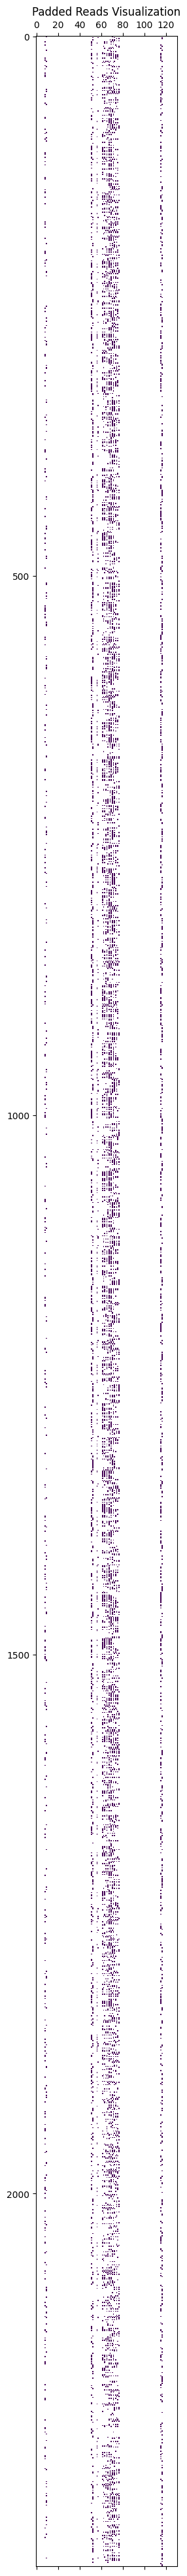

Visualization completed.
Region length: 131
CCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [8, 51, 56, 61, 63, 65, 67, 69, 71, 73, 75, 115]
Forward reads: 1299
Reverse reads: 1047
DataFrame shape: (2346, 131)
         C    C    A    T    T    C    A    G      C      G  ...    C    T  \
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  297.0  180.0  ...  0.0  0.0   
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    0.0    0.0  ...  NaN  NaN   
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   

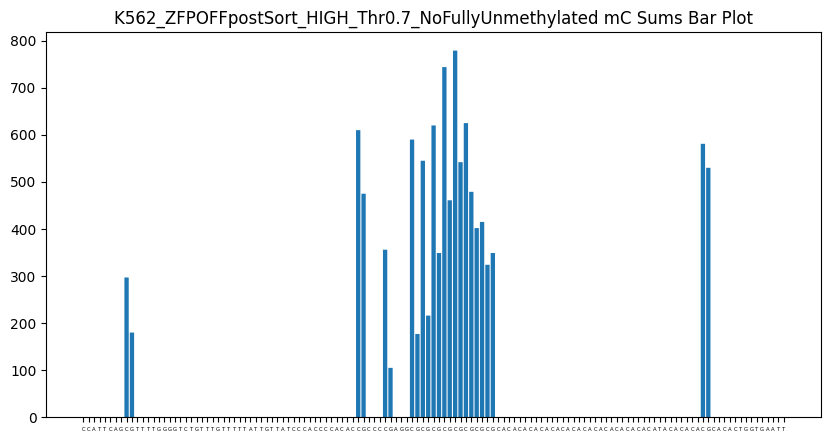

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.12659847 0.07672634 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.26001705 0.20247229 0.
 0.         0.         0.15174766 0.04475703 0.         0.
 0.         0.2514919  0.07544757 0.23231032 0.09207161 0.26427962
 0.14876385 0.31713555 0.19650469 0.33205456 0.23103154 0.26641091
 0.20417732 0.1713555  0.17689685 0.13810742 0.14876385 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.

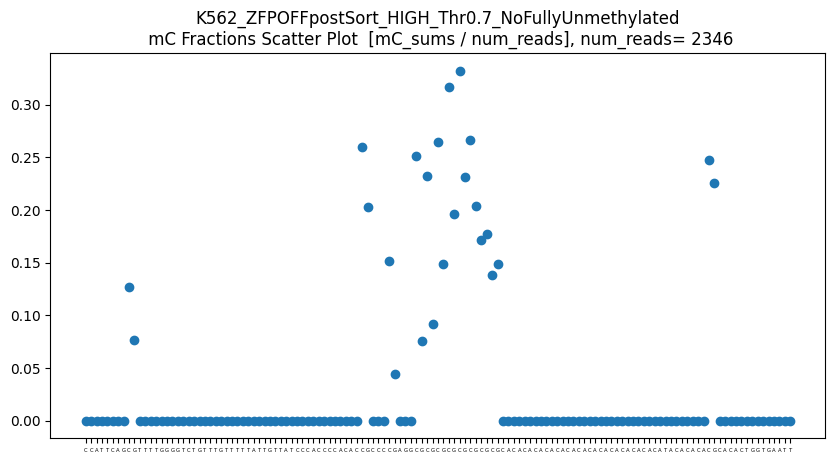

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums  = [ 477. 1085.  461.  767.  761.  969. 1205. 1321. 1104.  817.  673. 1111.]


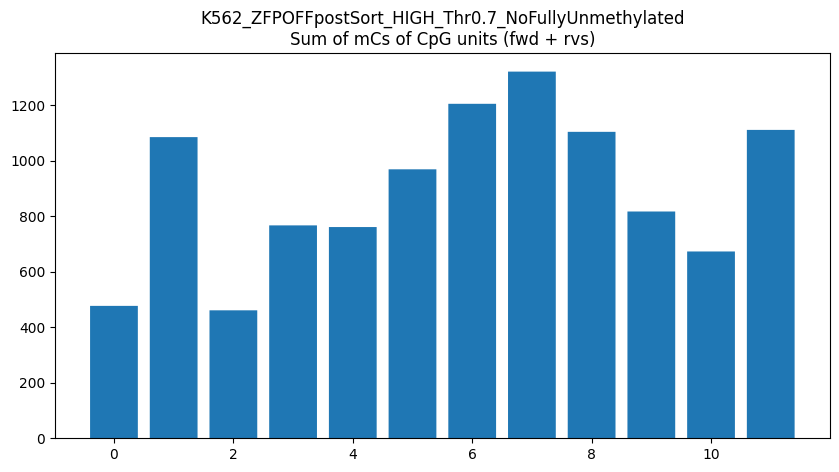

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums / len(CGs_all) = [0.20332481 0.46248934 0.19650469 0.32693947 0.32438193 0.41304348
 0.51364024 0.5630861  0.47058824 0.34825234 0.28687127 0.47357204]


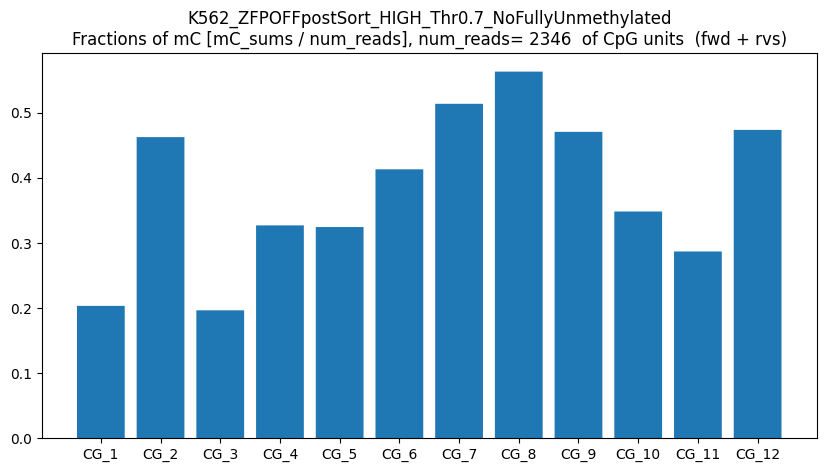

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_on_fwd_C_sums = [   0.    0.    0.    0.    0.    0.    0.    0.  477.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0. 1085.    0.    0.    0.    0.  461.    0.    0.    0.
    0.  767.    0.  761.    0.  969.    0. 1205.    0. 1321.    0. 1104.
    0.  817.    0.  673.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0. 1111.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]


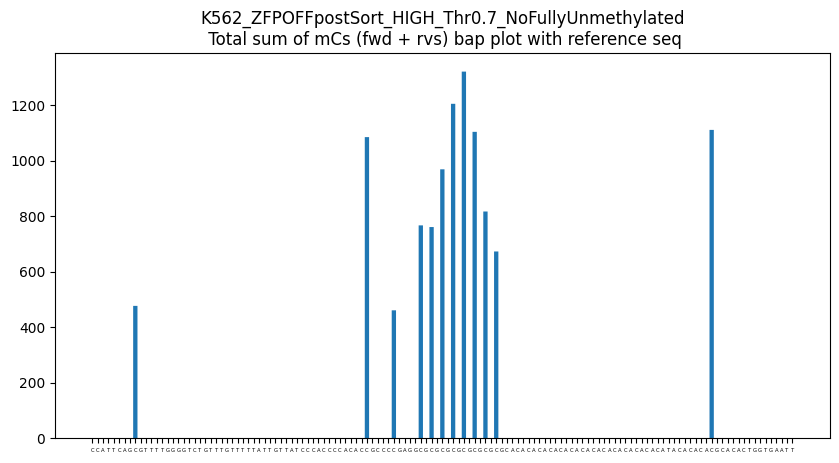

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


len(CGs_all) = 2346
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.20332481 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.46248934 0.         0.
 0.         0.         0.19650469 0.         0.         0.
 0.         0.32693947 0.         0.32438193 0.         0.41304348
 0.         0.51364024 0.         0.5630861  0.         0.47058824
 0.         0.34825234 0.         0.28687127 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

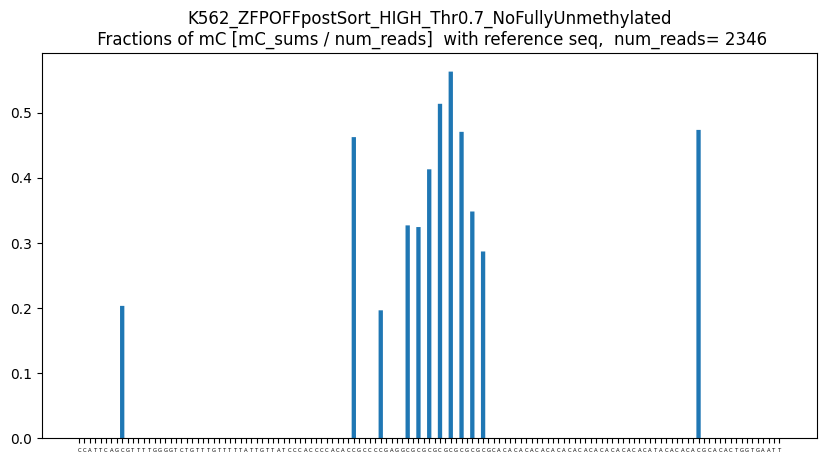

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



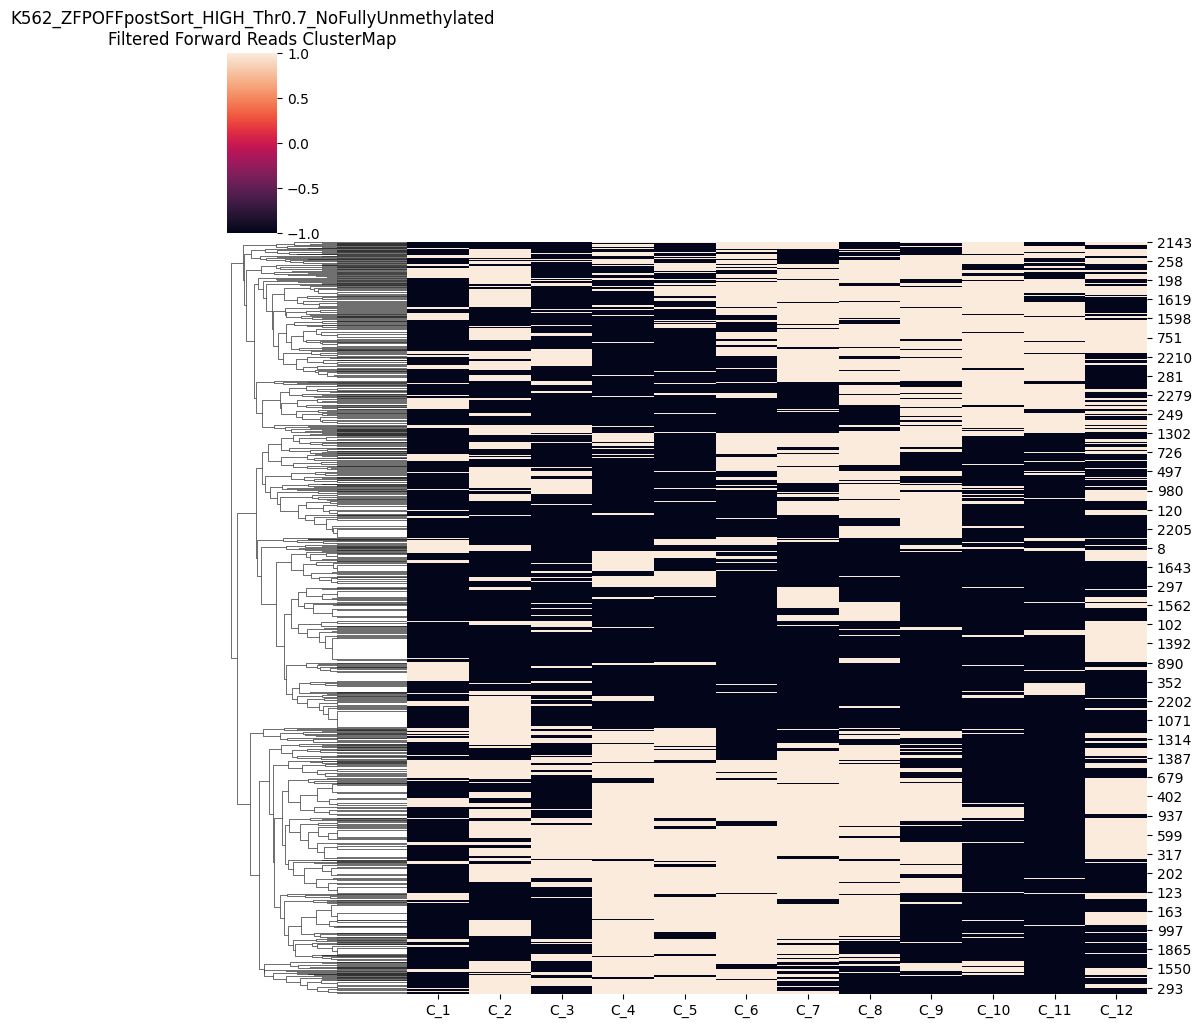

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



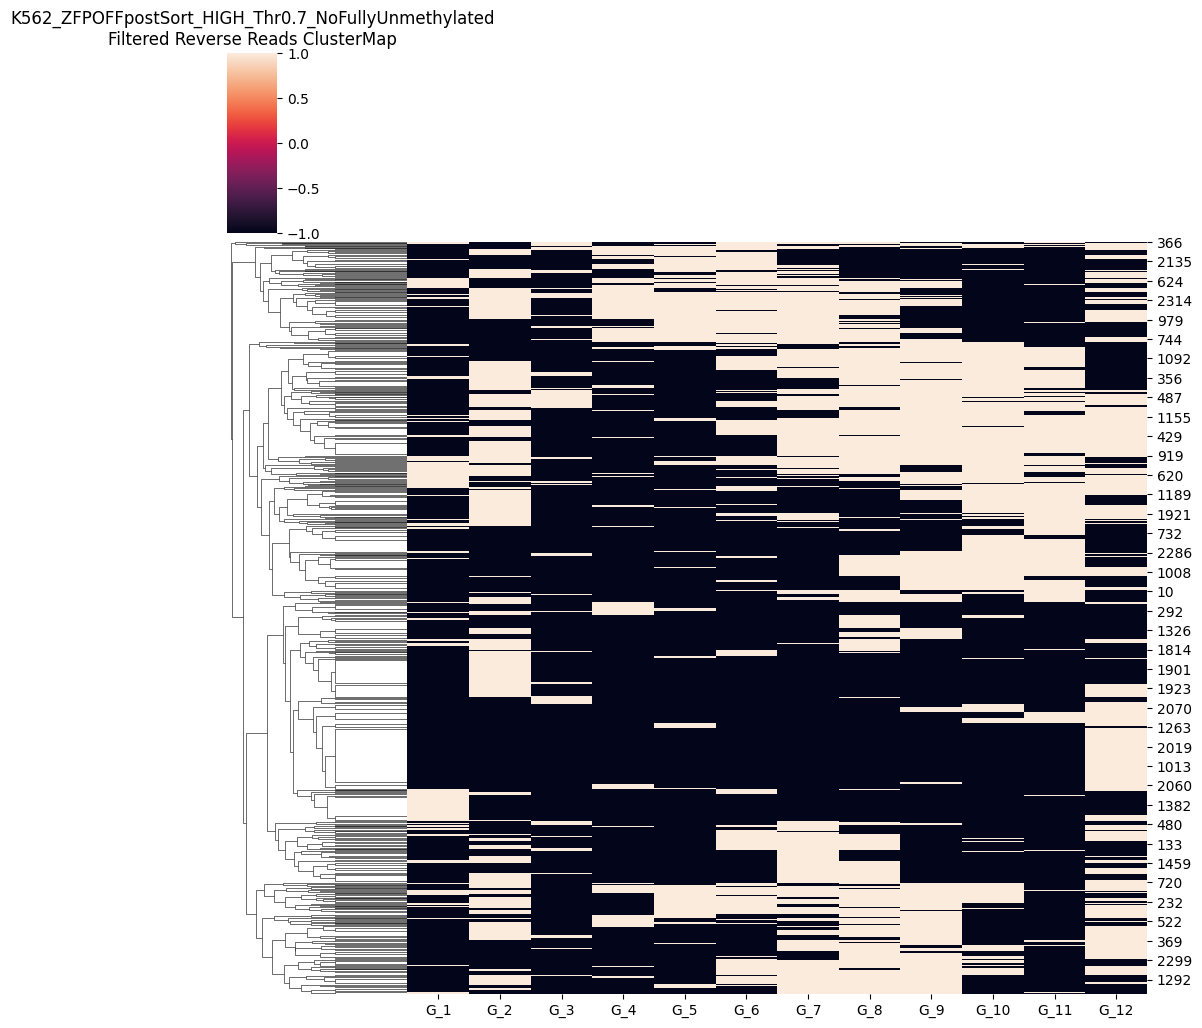

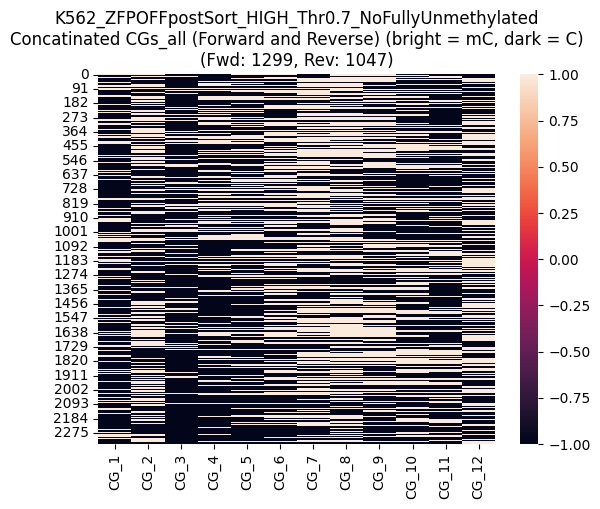

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



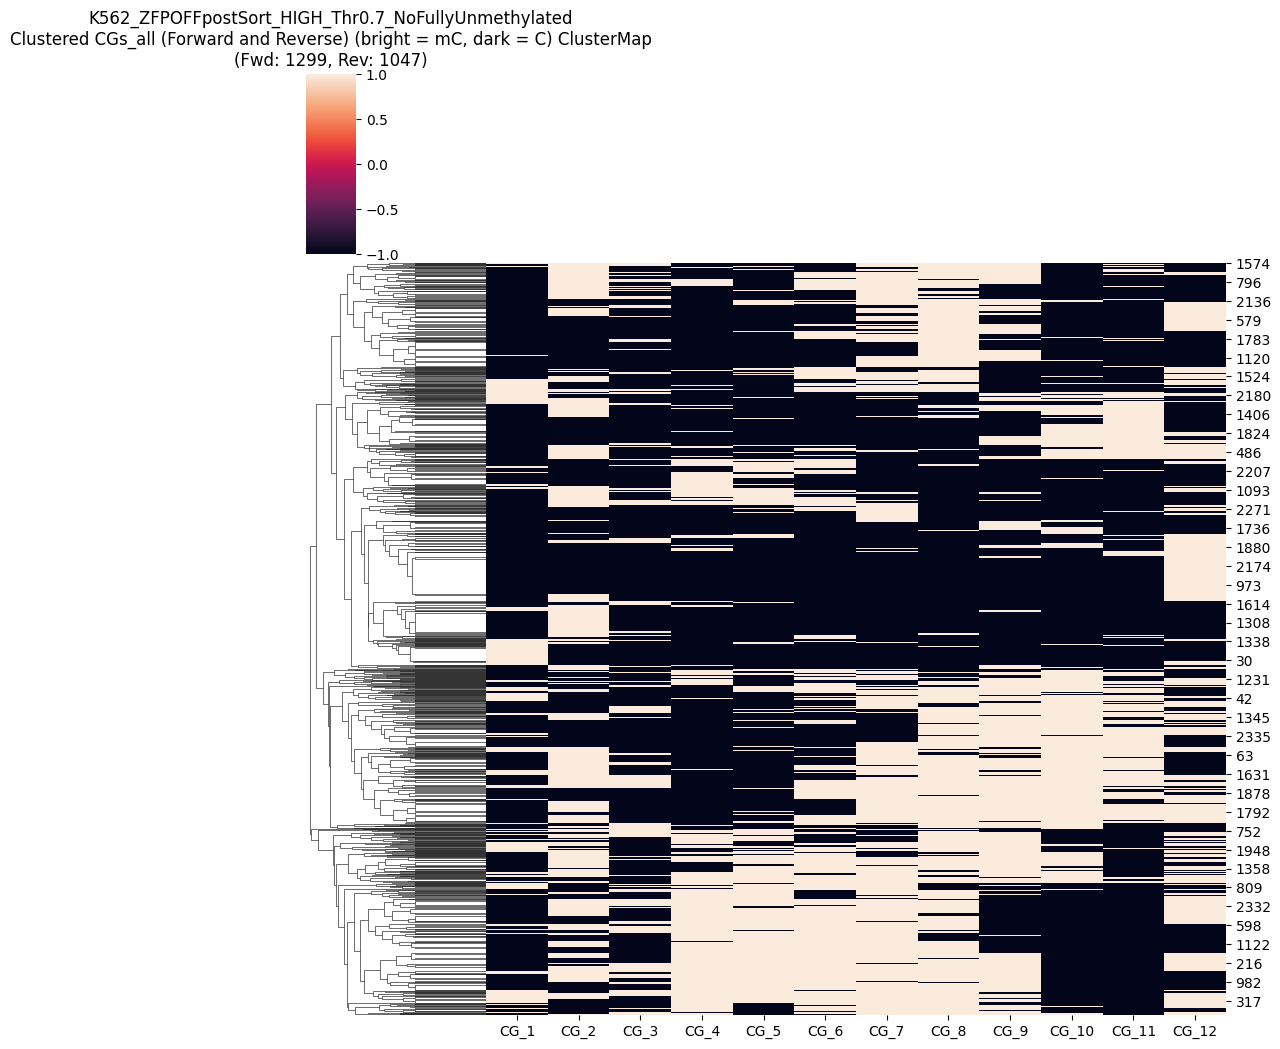

CGs_all saved as CG_12_units_combined_K562_ZFPOFFpostSort_HIGH_Thr0.7_NoFullyUnmethylated_numFWD1299_numRVS1047_padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.7_NoFullyUnmethylated_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [9]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### ROI Extraction Results from  Silenced sorted cells :
From around   reads located near the ROI, 

 ~  reads have non-zery mC 
 
 (with 70% confidance in at least one methylated C the mC calls ) 

Forward reads:  

Reverse reads:  


# Change the mC threshold to 0.9 - only keep very confident mC values


System: Linux
Release: 6.8.0-52-generic
Version: #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
region_length 131
CCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATT
131
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.9 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v1_1_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_c…

          |    0%

          | Transferring 3530 from reads.CG,0.txt into reads.combined_basemods.h5, new size 3530   0% | 00:00<…

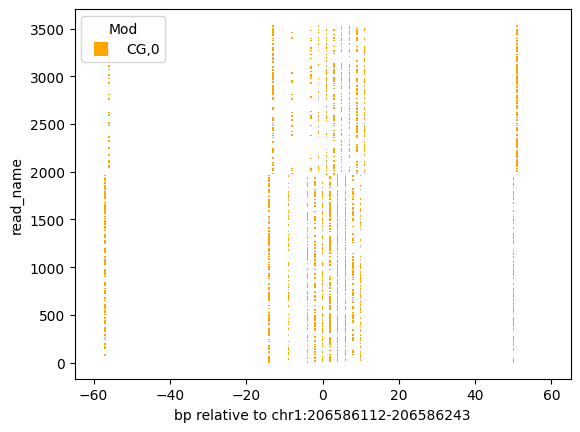

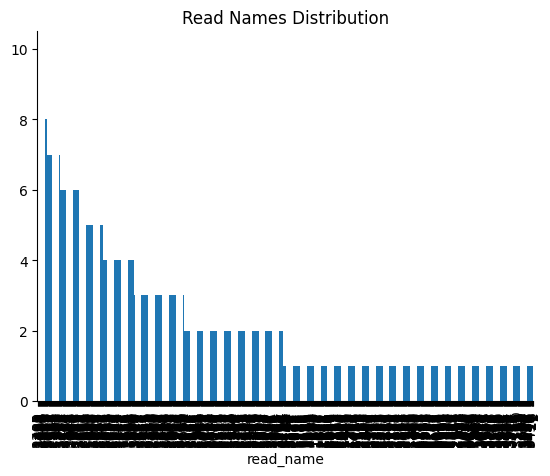

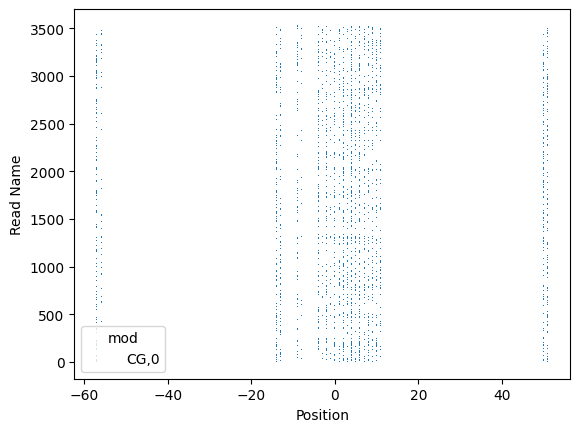

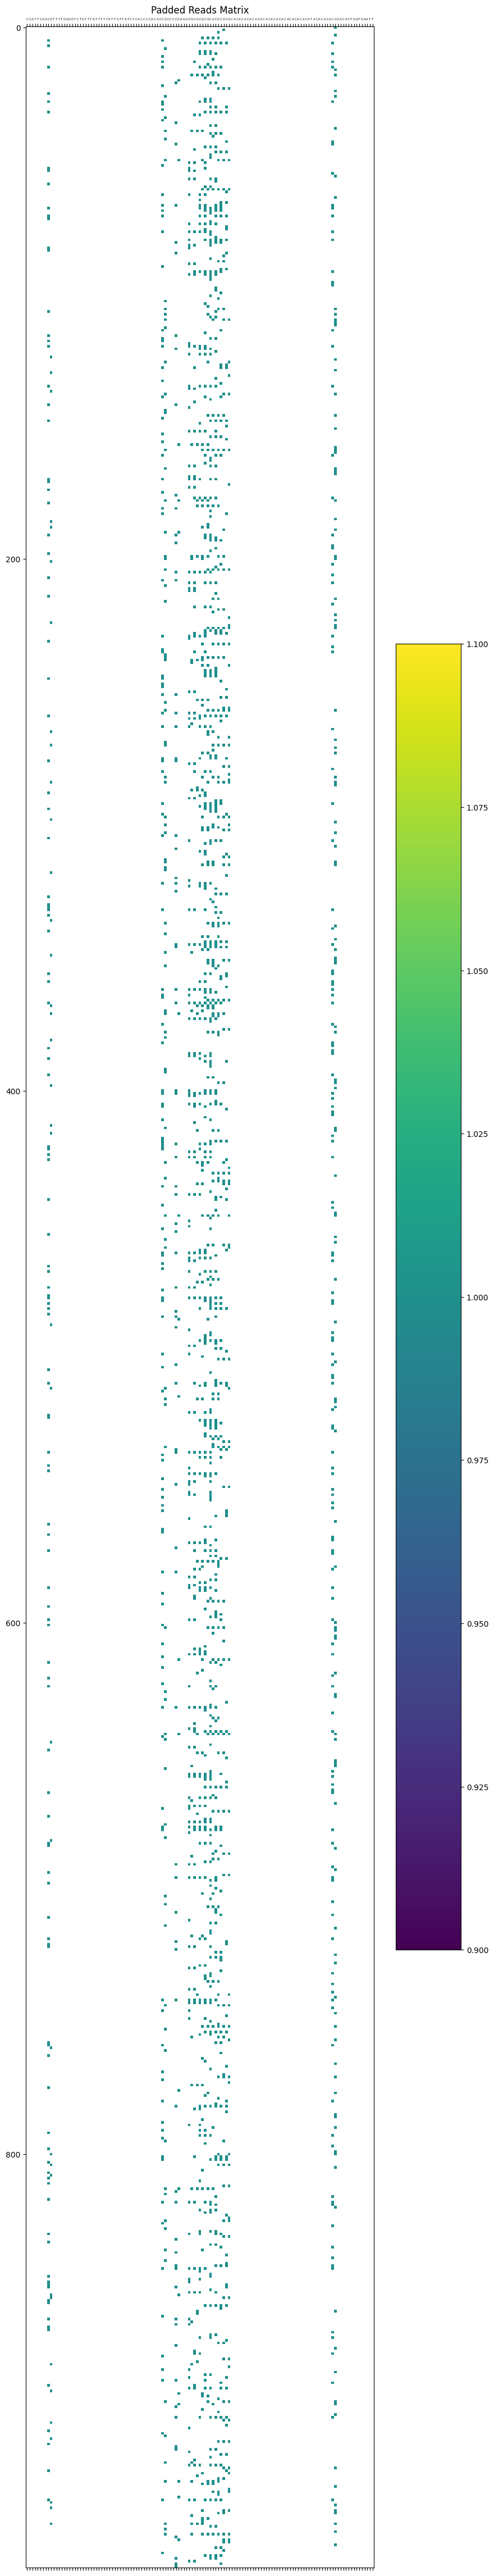

Padded reads saved to padded_reads_K562_ZFPOFFpostSort_LOW70_Thr0.9_NoFullyUnmethylated_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy


In [10]:
system_info()

experiment_name = "K562_ZFPOFFpostSort_LOW70_Thr0.9_NoFullyUnmethylated"
threshold_mC =  0.9 #  0.9 #0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATs_K562_ZFPOFFpostSort_LOW70/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATs_K562_ZFPOFFpostSort_LOW70_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

date_today = datetime.today().strftime('%Y-%m-%d')

# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# # t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

motifs=['CG,0']
ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

keep_unmethylated_reads = False

if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

Padded reads loaded successfully.


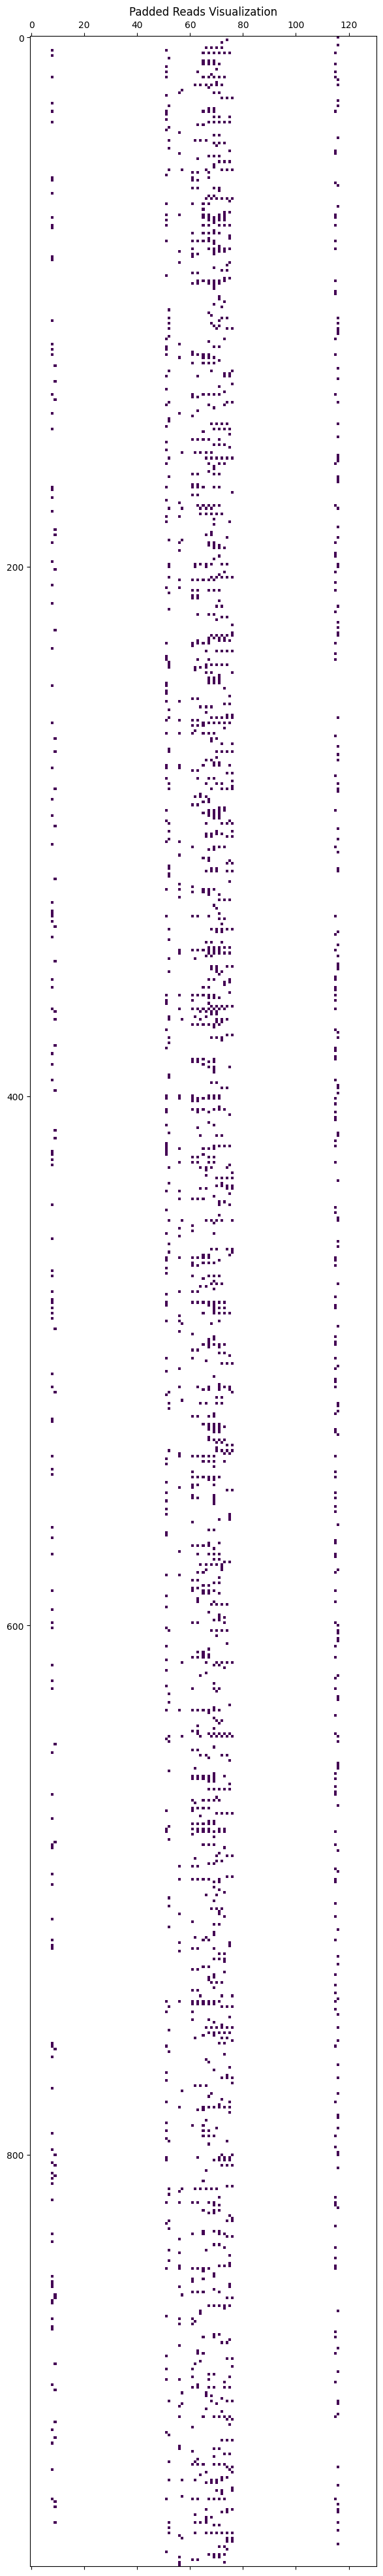

Visualization completed.
Region length: 131
CCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [8, 51, 56, 61, 63, 65, 67, 69, 71, 73, 75, 115]
Forward reads: 611
Reverse reads: 345
DataFrame shape: (956, 131)
         C    C    A    T    T    C    A    G      C     G  ...    C    T  \
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  117.0  37.0  ...  0.0  0.0   
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    0.0   0.0  ...  NaN  NaN   
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0   1.0  ...  NaN  NaN   
max    NaN

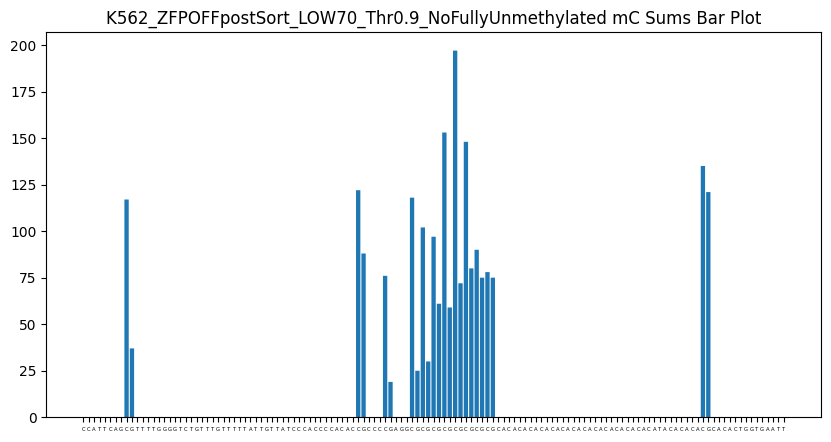

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.12238494 0.03870293 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.12761506 0.09205021 0.
 0.         0.         0.07949791 0.01987448 0.         0.
 0.         0.12343096 0.02615063 0.10669456 0.03138075 0.10146444
 0.06380753 0.16004184 0.06171548 0.20606695 0.07531381 0.15481172
 0.08368201 0.09414226 0.07845188 0.08158996 0.07845188 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.

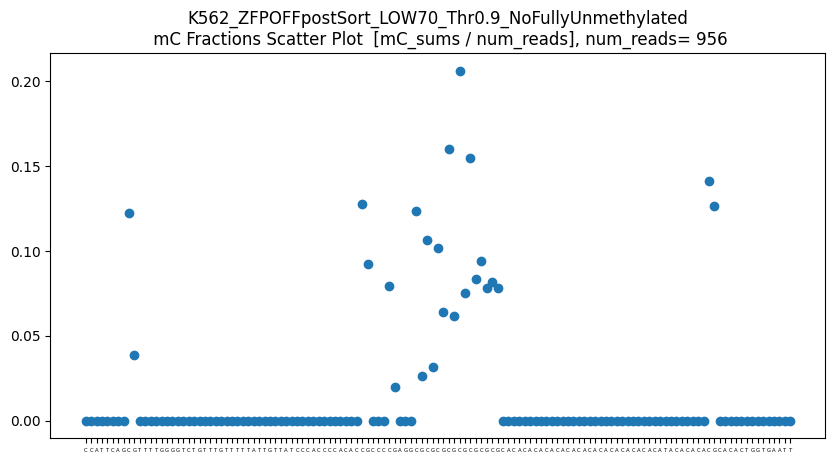

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums  = [154. 210.  95. 143. 132. 158. 212. 269. 228. 165. 153. 256.]


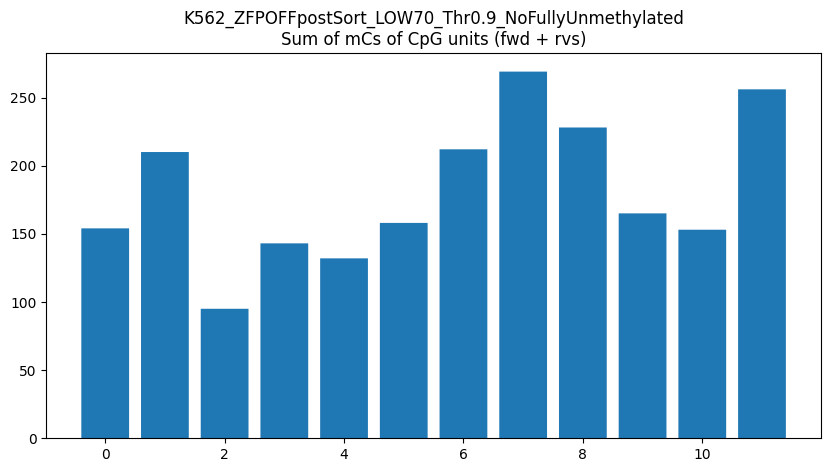

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums / len(CGs_all) = [0.16108787 0.21966527 0.09937238 0.14958159 0.13807531 0.16527197
 0.22175732 0.28138075 0.23849372 0.17259414 0.16004184 0.26778243]


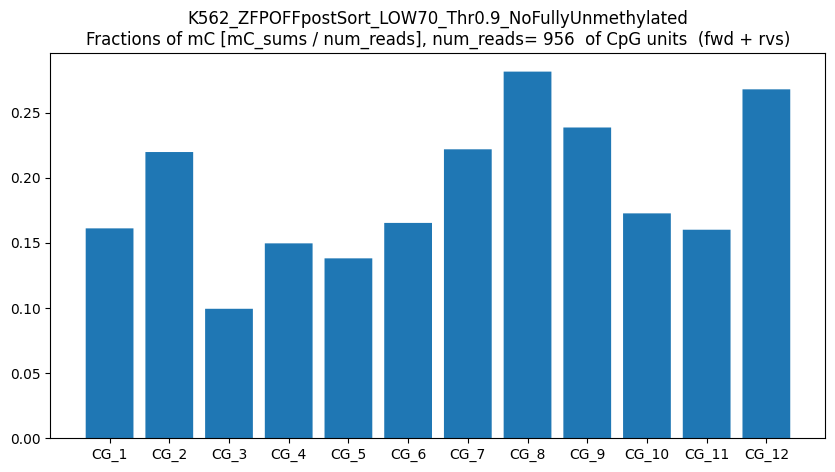

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_on_fwd_C_sums = [  0.   0.   0.   0.   0.   0.   0.   0. 154.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 210.   0.   0.   0.   0.
  95.   0.   0.   0.   0. 143.   0. 132.   0. 158.   0. 212.   0. 269.
   0. 228.   0. 165.   0. 153.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 256.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.]


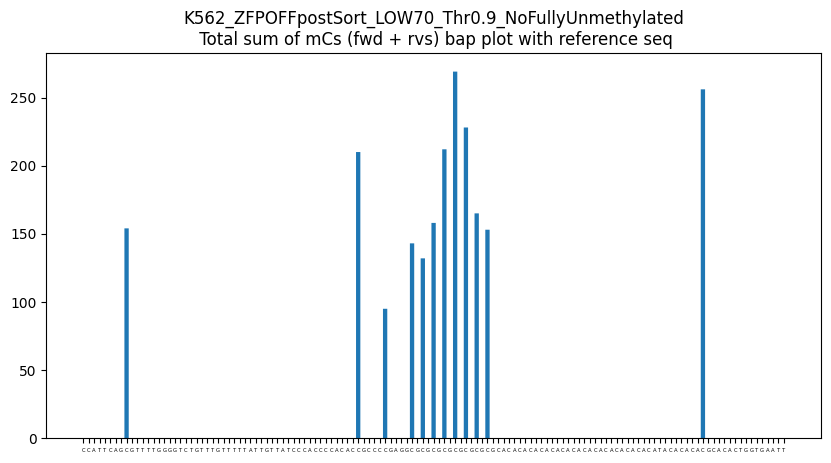

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


len(CGs_all) = 956
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.16108787 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.21966527 0.         0.
 0.         0.         0.09937238 0.         0.         0.
 0.         0.14958159 0.         0.13807531 0.         0.16527197
 0.         0.22175732 0.         0.28138075 0.         0.23849372
 0.         0.17259414 0.         0.16004184 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.     

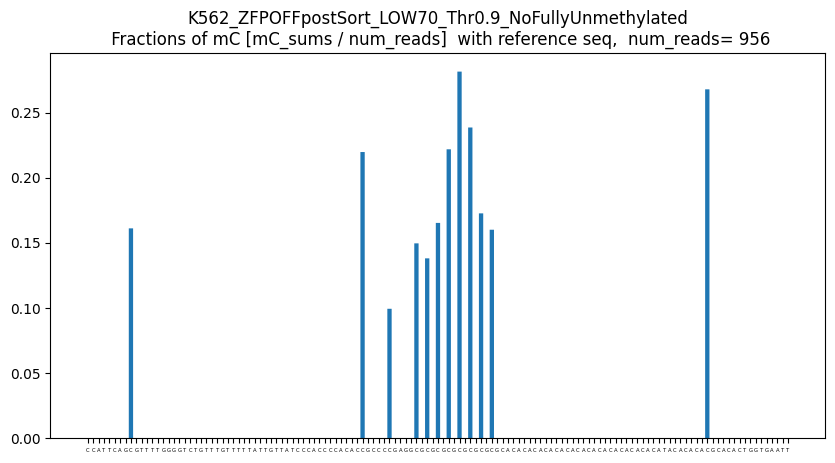

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


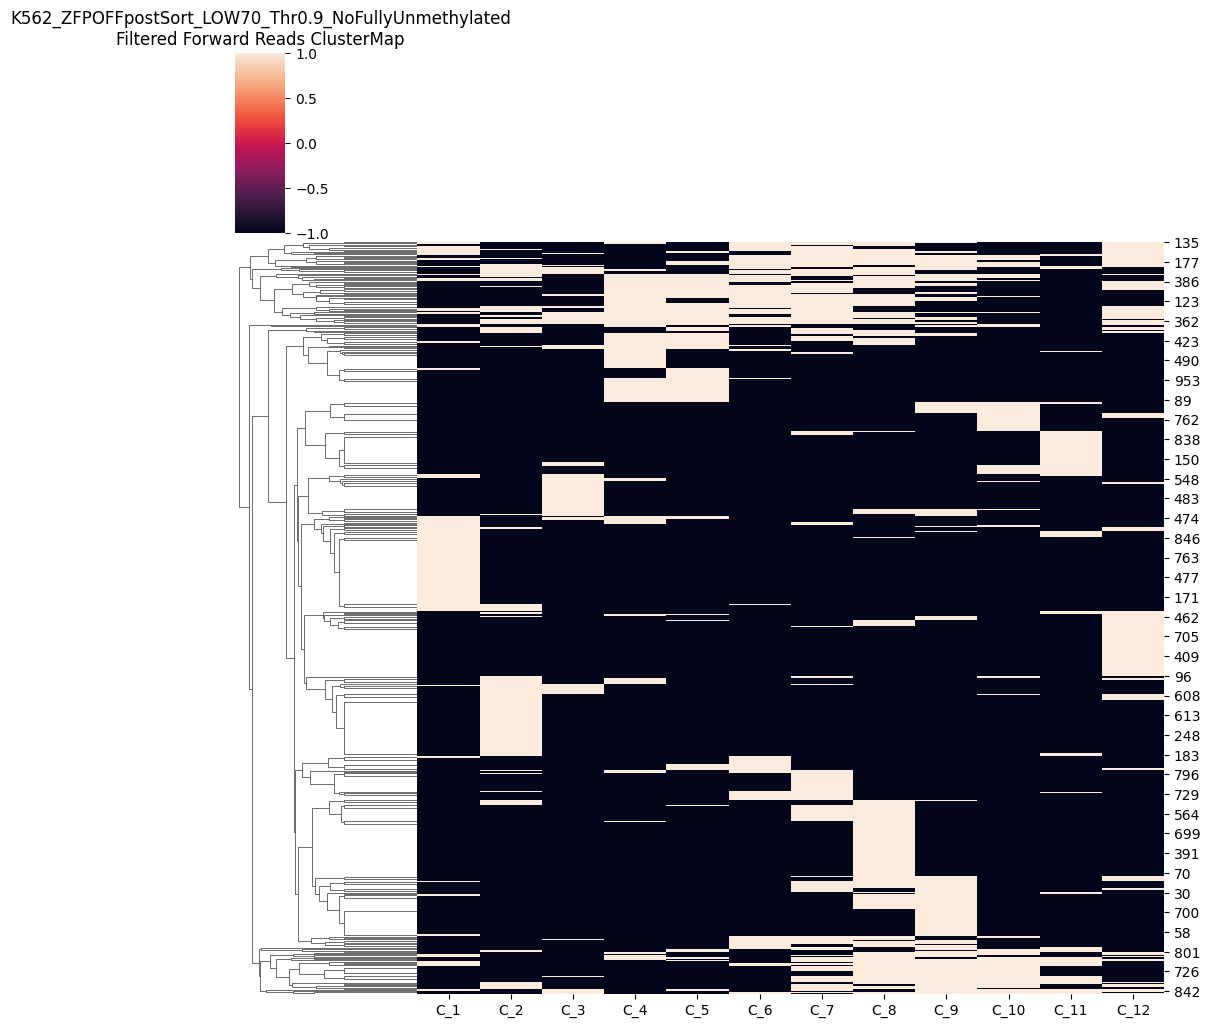

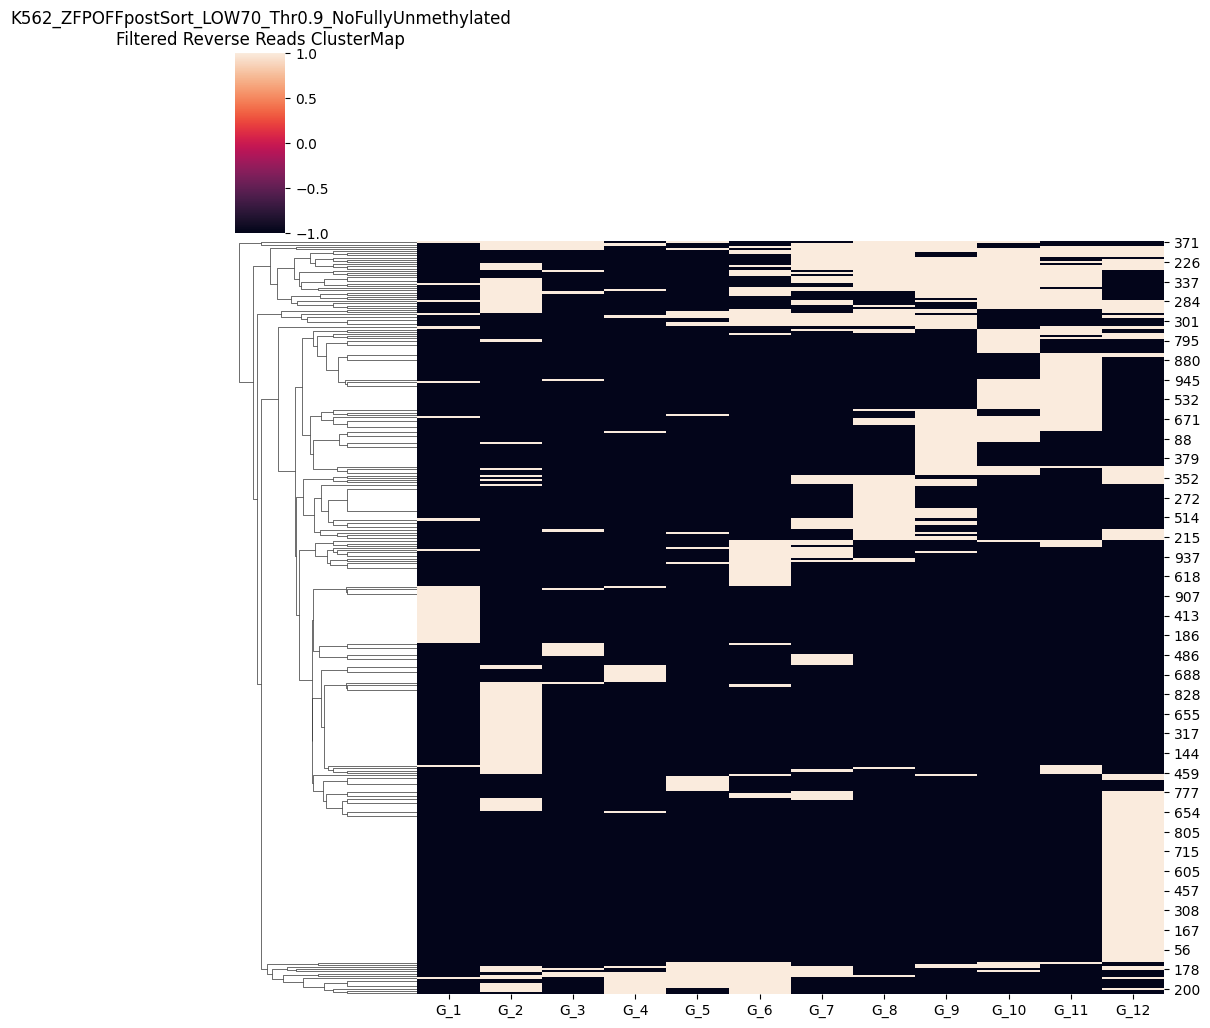

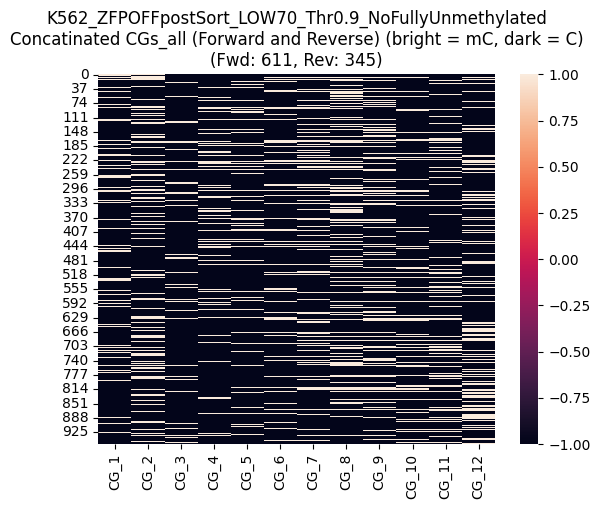

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



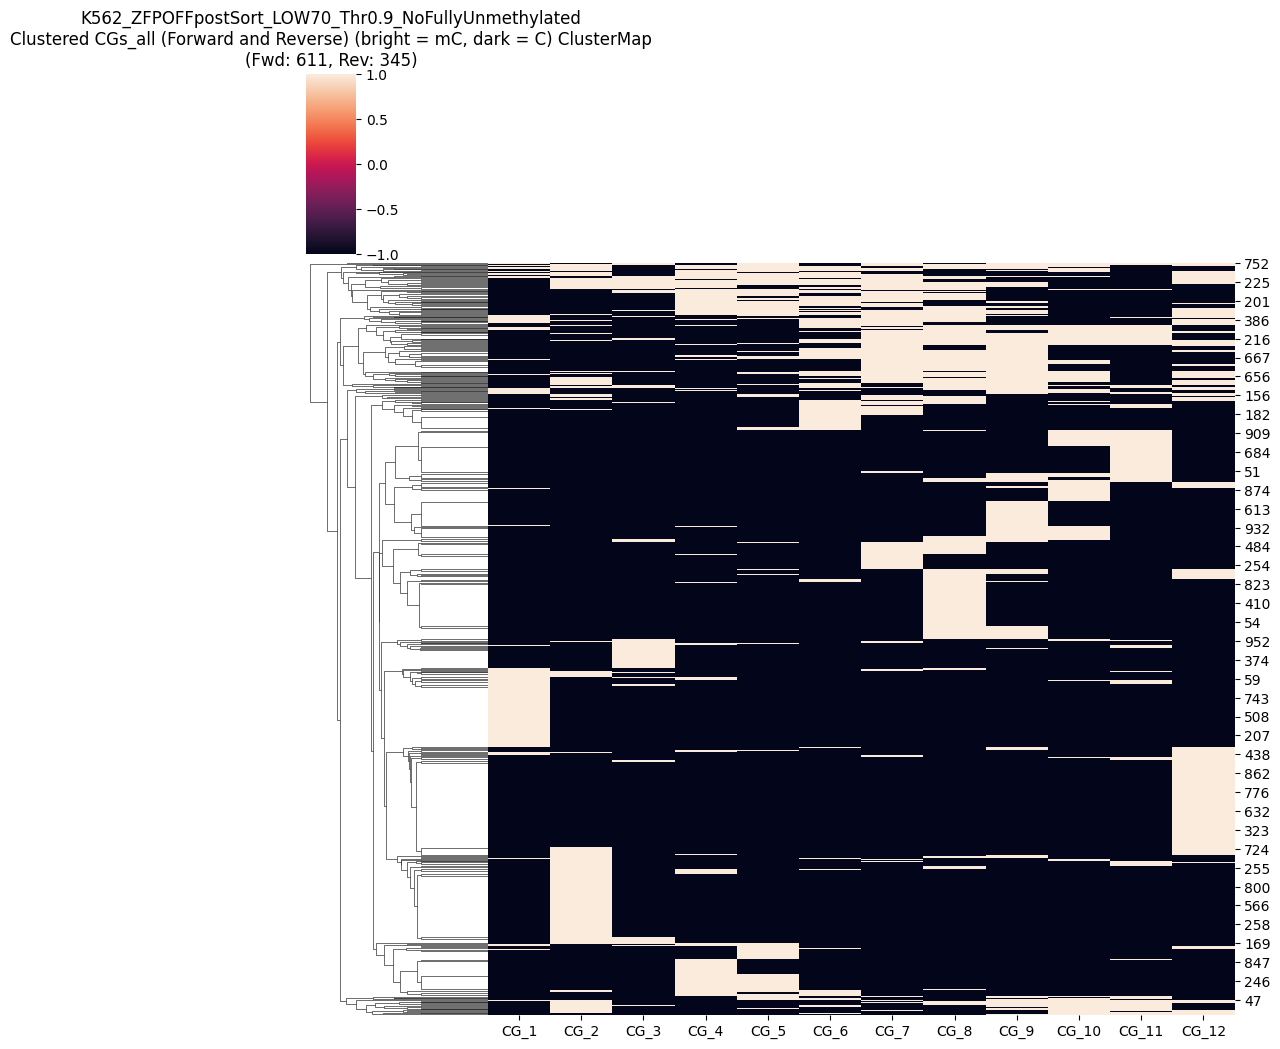

CGs_all saved as CG_12_units_combined_K562_ZFPOFFpostSort_LOW70_Thr0.9_NoFullyUnmethylated_numFWD611_numRVS345_padded_reads_K562_ZFPOFFpostSort_LOW70_Thr0.9_NoFullyUnmethylated_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [11]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all, C_fwd_df, G_revs_df, padded_reads_df = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### Results for ROI Extraction from Unedited T cells:
From around ~3000 reads located near the ROI, 

only ~1300 reads have non-zery mC

(with 90% confidance at least one methylated C  in the mC call) 

Forward reads: 788

Reverse reads: 516 

# Analyze the Edited CRISPROff cells from the same T prime cells from Elaine ES

System: Linux
Release: 6.8.0-52-generic
Version: #53~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Jan 15 19:18:46 UTC 2
Processor: x86_64
Python version: 3.11.9 | packaged by conda-forge | (main, Apr 19 2024, 18:36:13) [GCC 12.3.0]
No specified number of cores requested. 24 available on machine, allocating all.
Modification threshold of 0.9 will be treated as coming from range 0-1.


          | Step 1: Identify motif locations in chm13.draft_v1.1.fasta   0% | 00:00

          | Step 2: Parse regions in sort_align_t2t_v1_1_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_co…

          |    0%

          | Transferring 2638 from reads.CG,0.txt into reads.combined_basemods.h5, new size 2638   0% | 00:00<…

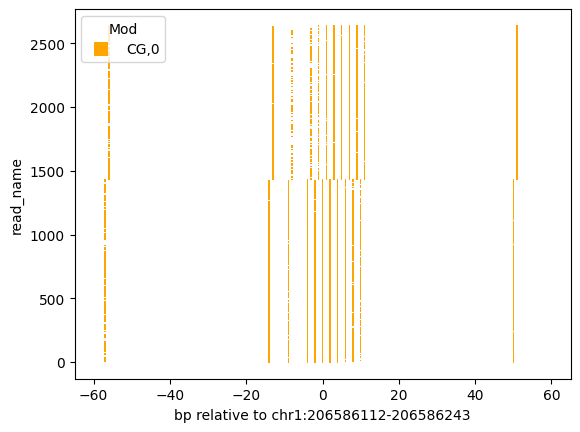

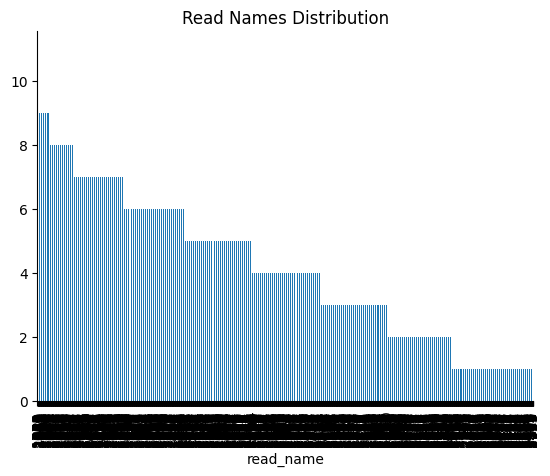

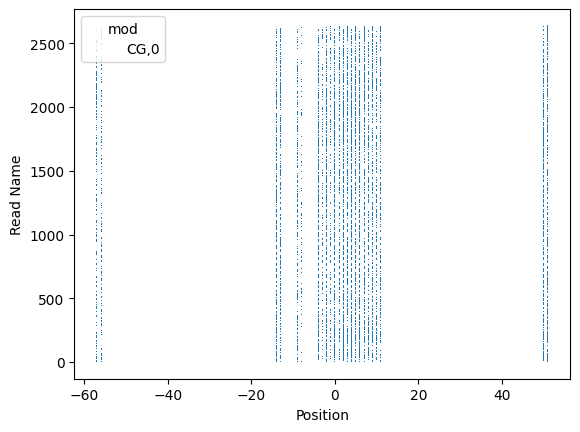

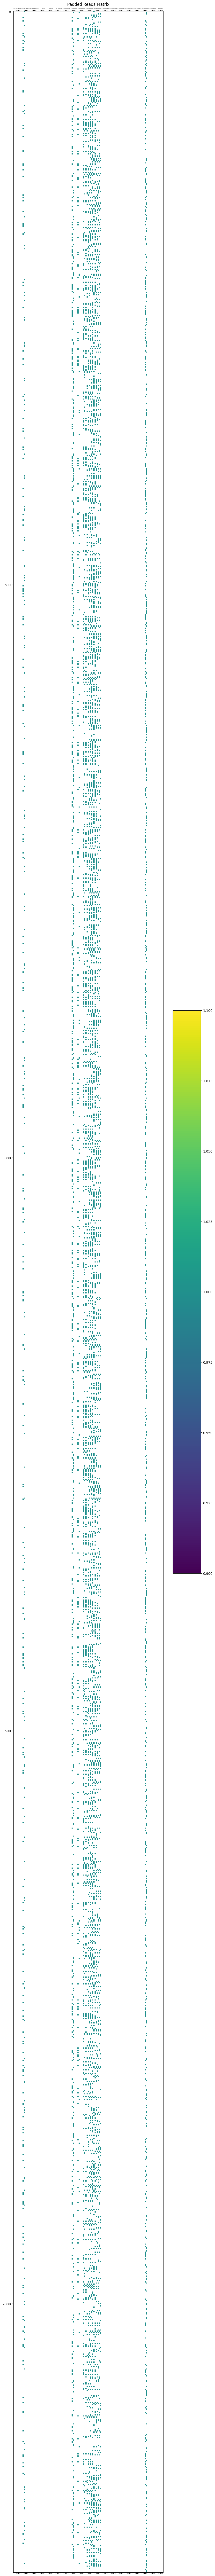

Padded reads saved to padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy


In [12]:
system_info()

experiment_name = "K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated"
# threshold_mC = 0.9 # 0.75 # 0.99
bam_path = "/home/michalula/data/cas9_nanopore/data/20241226_nCATS_K562_ZFPOFFpostSort_HIGH/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_nCATS_K562_ZFPOFFpostSort_HIGH_R9min_converted_fast5.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9/pod5_converted_basecall/5mCG/to_t2t_v1_1/sort_align_t2t_v1_1_trim_20241226_MR_nCATs_TPrES_CROFF90prD6_P2R9.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"
# "/home/michalula/data/cas9_nanopore/data/20241226_MR_nCATs_TcellsPrES_unedit_P2R9/passed_fast5/5mCG/to_t2t_v1_1/sort_align_trim_20241226_MR_nCATs_TcellsPrES_unedit_P2R9_passed.dna_r9.4.1_e8_sup@v3.3.5mCG.bam"

# date_today = datetime.today().strftime('%Y-%m-%d')
# ref_genome_v1_1_file = Path('/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta')
# reg_genome_version = "t2t_v1_1"
# t2t_v1_1_cd55_30bps = 'chr1:206586162-206586192'
# region_chr = 'chr1'
# region_start = 206586162
# # region_end = 206586192
# region_str = region_chr + ":" + str(region_start) + "-" + str(region_end) #'chr1:206586162-206586192'
# region_length = region_end - region_start
# print("region_length", region_length)


save_padded_reads_name_np = f"padded_reads_{experiment_name}_mCthresh{threshold_mC}_{reg_genome_version}_{region_str}_{date_today}.npy"
output_dir = create_output_directory("./dimelo_v2_output")

# motifs=['CG,0']
# ref_seq_list = get_reference_sequence(ref_genome_v1_1_file, region_chr, region_start, region_end)


extract_file, extract_regions = extract_from_bam(
    bam_path=bam_path,
    ref_genome_file=ref_genome_v1_1_file,
    output_dir=output_dir,
    regions=region_str,
    motifs=motifs,
    output_name='extracted_reads',
    threshold_mC=threshold_mC,
)

keep_unmethylated_reads = False
if extract_file:
    if keep_unmethylated_reads:
        reads_df, regions_dict = process_extracted_reads(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)

        padded_reads = create_padded_reads(reads_df, regions_dict, region_length)
    else:
        reads_df, regions_dict = process_extracted_reads_no_fully_unmethylated(extract_file, region_str, motifs, ref_seq_list)
        visualize_data(reads_df)
        padded_reads = create_padded_reads_no_fully_unmethylated(reads_df, regions_dict, region_length)
    if padded_reads is not None:
        plot_padded_reads(padded_reads, ref_seq_list)
        save_padded_reads(padded_reads, output_dir, save_padded_reads_name_np)

In [13]:
save_padded_reads_name_np

'padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy'

Padded reads loaded successfully.


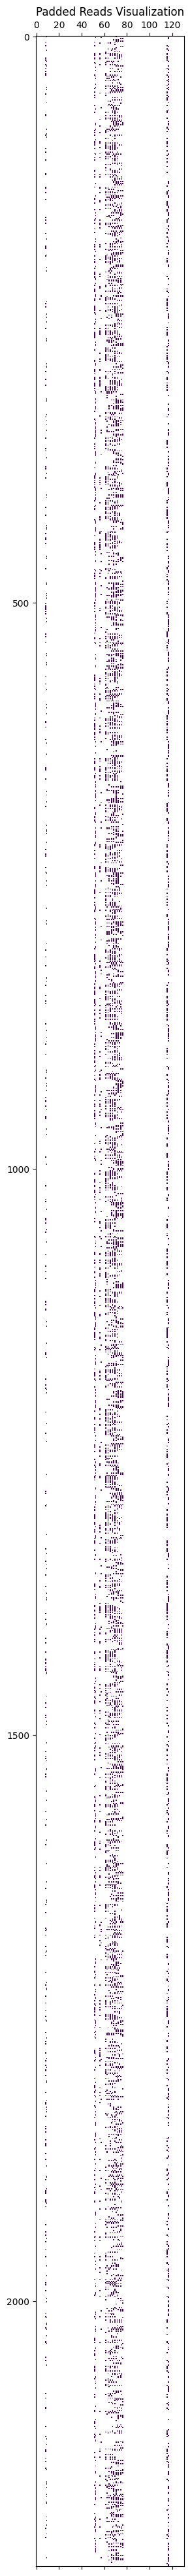

Visualization completed.
Region length: 131
CCATTCAGCGTTTTGGGGTCTGTTTGTTTTTATTGTTATCCCACCCCACACCGCCCCGAGGCGCGCGCGCGCGCGCGCACACACACACACACACACACACACACACATACACACACGCACACTGGTGAATT
131
Reference sequence retrieved.
DataFrame created successfully.
CG Pair Indices: [8, 51, 56, 61, 63, 65, 67, 69, 71, 73, 75, 115]
Forward reads: 1234
Reverse reads: 1001
DataFrame shape: (2235, 131)
         C    C    A    T    T    C    A    G      C      G  ...    C    T  \
count  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  224.0  171.0  ...  0.0  0.0   
mean   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
std    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    0.0    0.0  ...  NaN  NaN   
min    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
25%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
50%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   
75%    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN    1.0    1.0  ...  NaN  NaN   

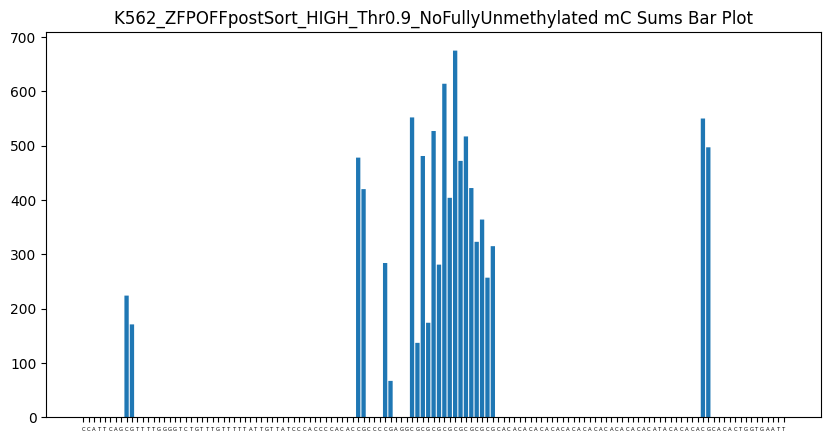

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


(mC_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.10022371 0.07651007 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.21387025 0.18791946 0.
 0.         0.         0.12706935 0.02997763 0.         0.
 0.         0.24697987 0.06129754 0.21521253 0.07785235 0.23579418
 0.12572707 0.27472036 0.18076063 0.30201342 0.21118568 0.23131991
 0.18881432 0.14451902 0.16286353 0.11498881 0.1409396  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.

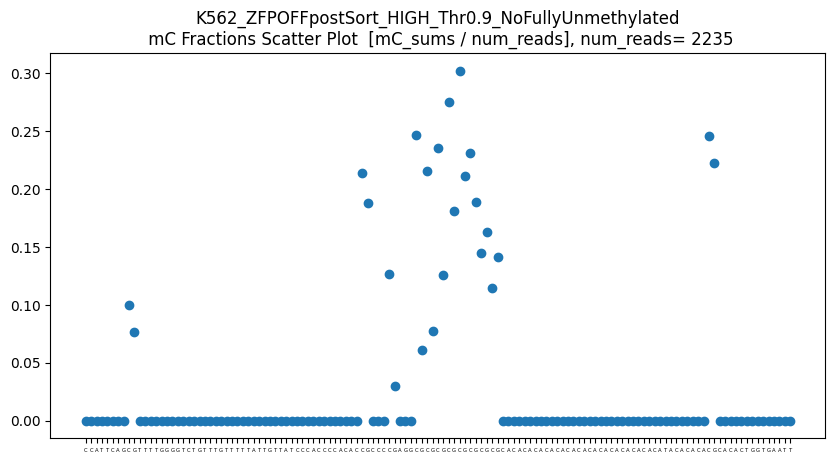

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums  = [ 395.  898.  351.  689.  655.  808. 1018. 1147.  939.  687.  572. 1047.]


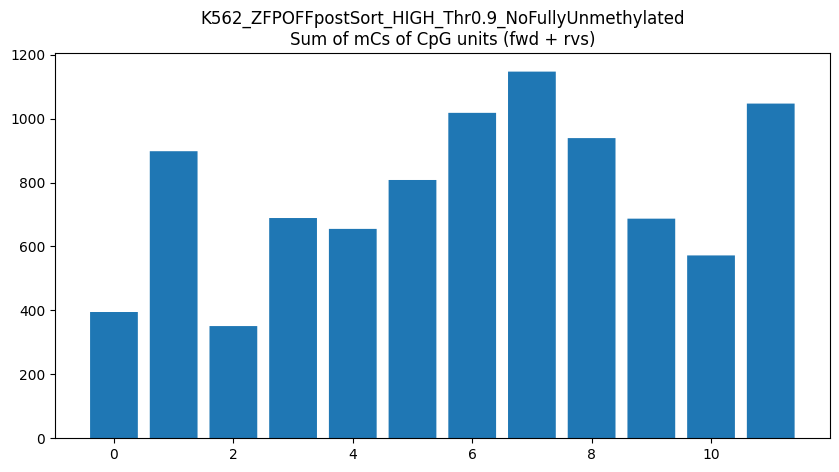

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_sums / len(CGs_all) = [0.17673378 0.40178971 0.15704698 0.3082774  0.29306488 0.36152125
 0.45548098 0.51319911 0.42013423 0.30738255 0.25592841 0.46845638]


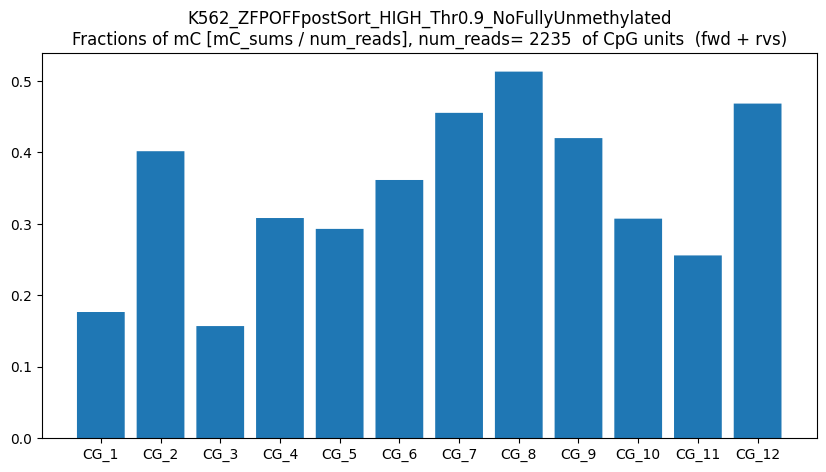

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (12, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


CGs_all_on_fwd_C_sums = [   0.    0.    0.    0.    0.    0.    0.    0.  395.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.  898.    0.    0.    0.    0.  351.    0.    0.    0.
    0.  689.    0.  655.    0.  808.    0. 1018.    0. 1147.    0.  939.
    0.  687.    0.  572.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0. 1047.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]


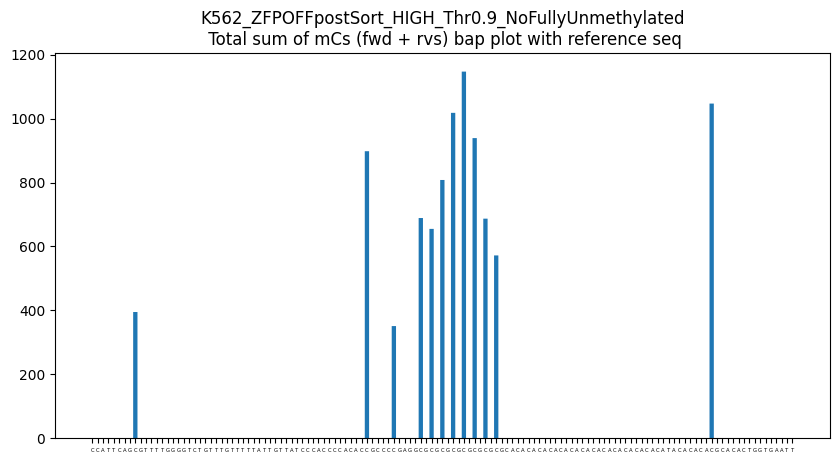

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


len(CGs_all) = 2235
CGs_all_on_fwd_C_sums / len(CGs_all) = [0.         0.         0.         0.         0.         0.
 0.         0.         0.17673378 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.40178971 0.         0.
 0.         0.         0.15704698 0.         0.         0.
 0.         0.3082774  0.         0.29306488 0.         0.36152125
 0.         0.45548098 0.         0.51319911 0.         0.42013423
 0.         0.30738255 0.         0.25592841 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.    

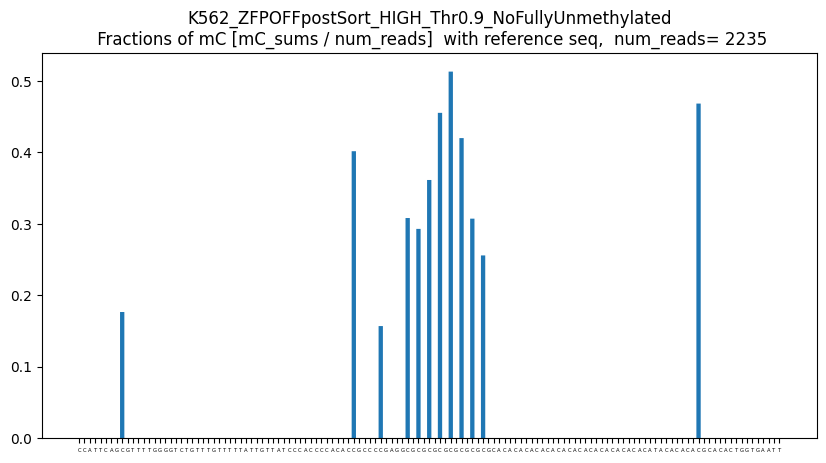

In plot_mC_sums_bar DataFrame columns: Index(['Index', 'Reference Sequence', 'mC Sums'], dtype='object')
In plot_mC_sums_bar DataFrame shape: (131, 3)
✅ Figure created successfully  Post fig.update_layout() : <class 'plotly.graph_objs._figure.Figure'>


/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



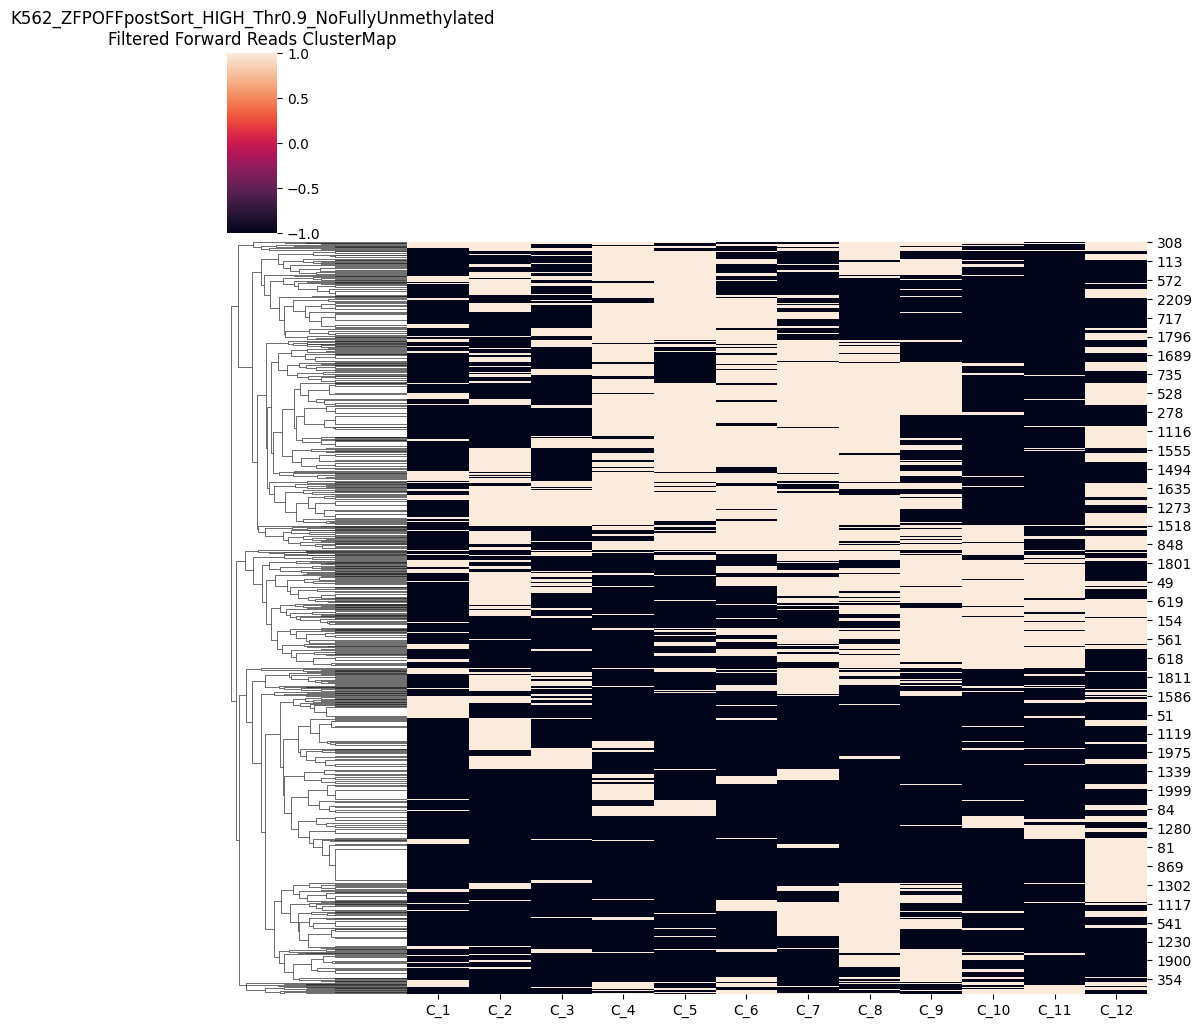

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



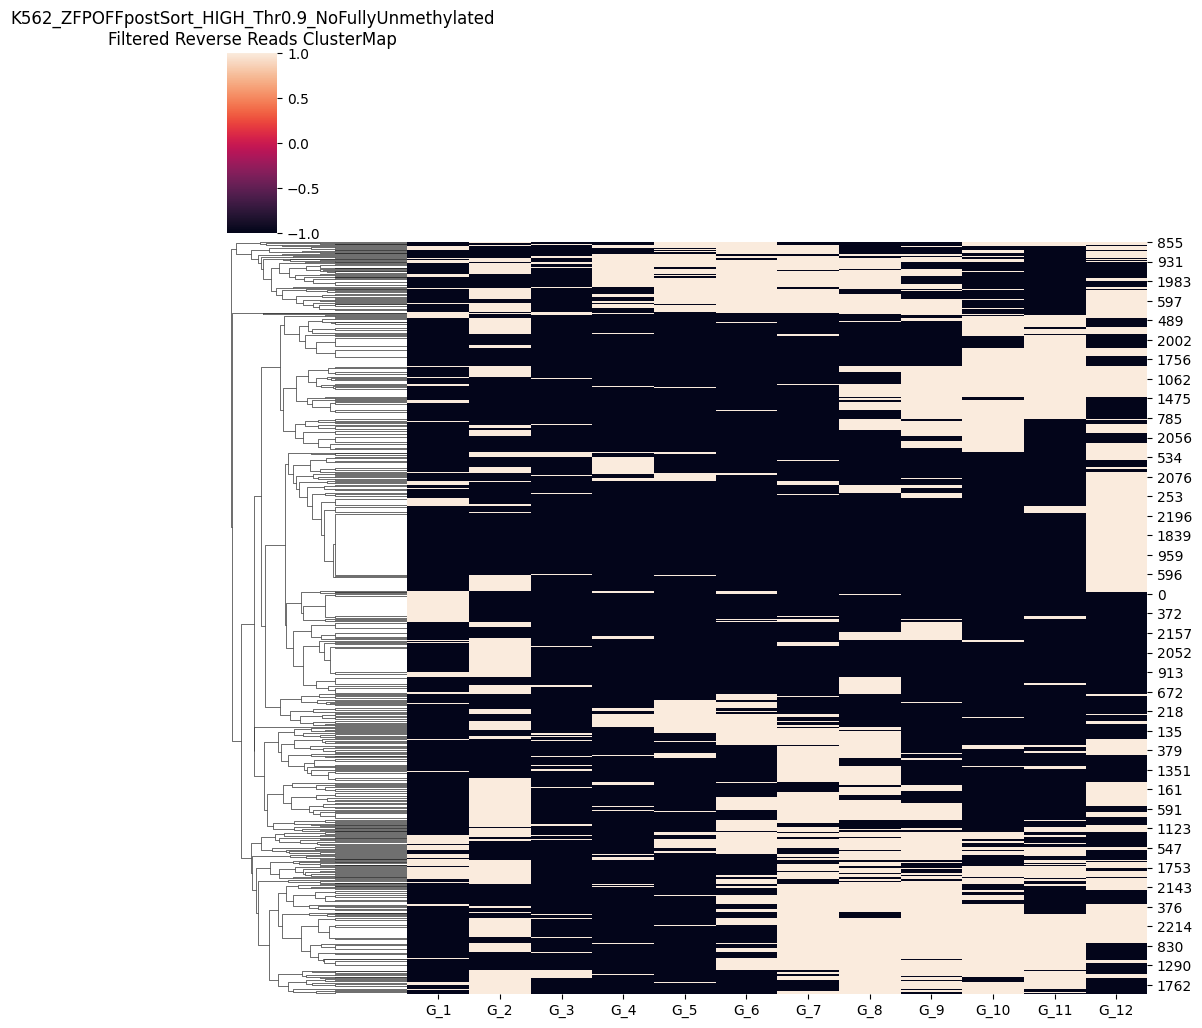

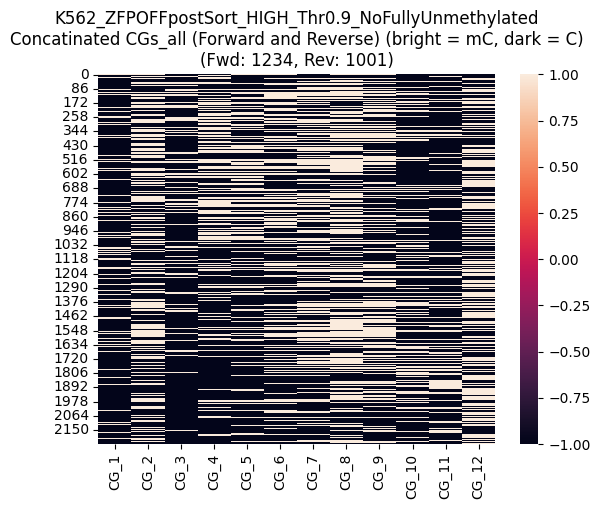

/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



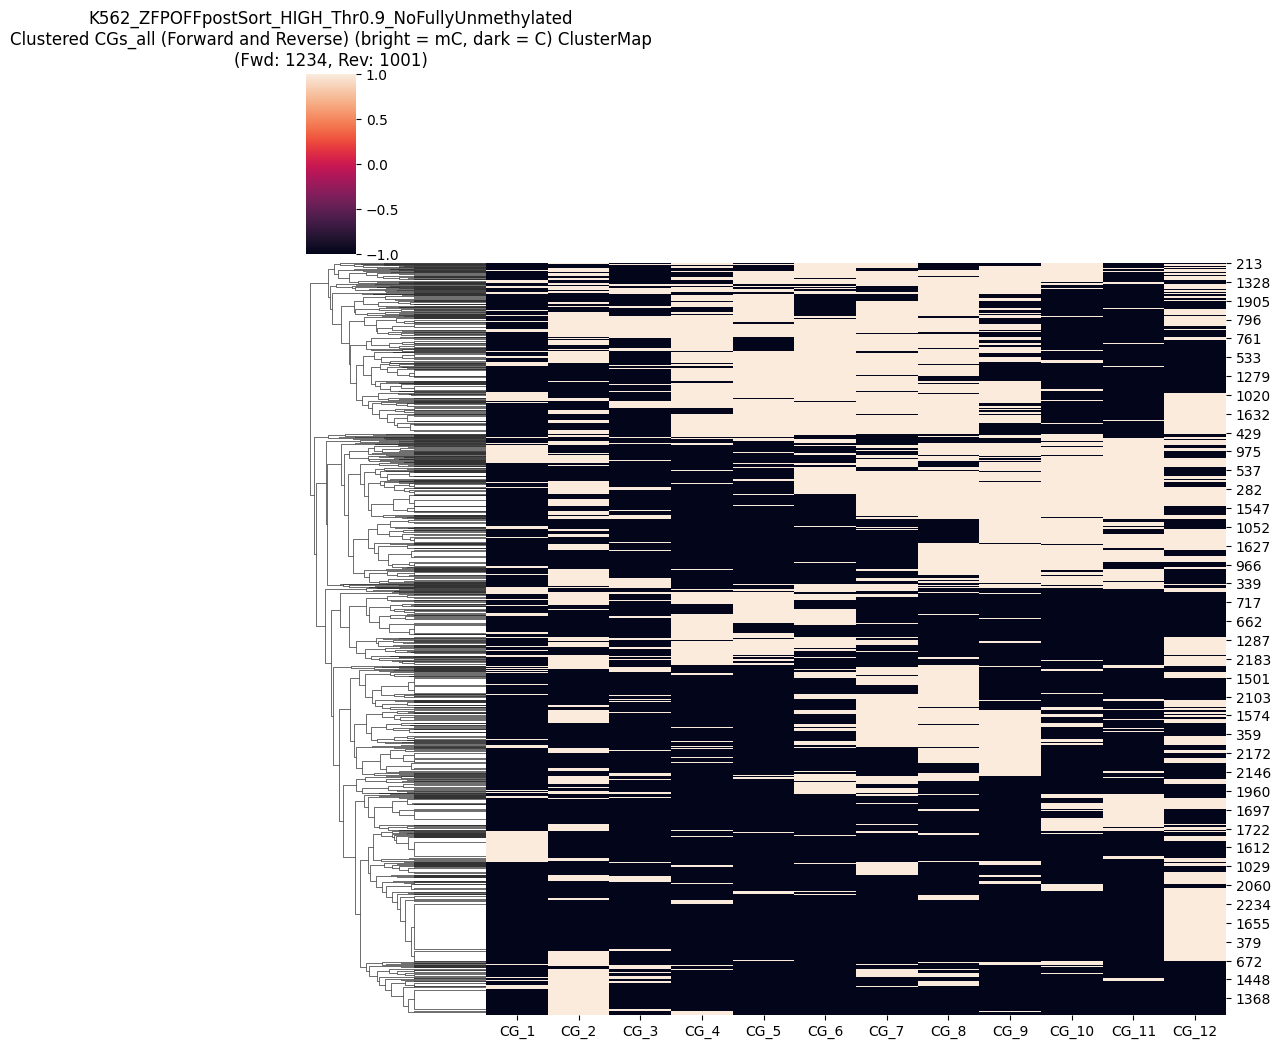

CGs_all saved as CG_12_units_combined_K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_numFWD1234_numRVS1001_padded_reads_K562_ZFPOFFpostSort_HIGH_Thr0.9_NoFullyUnmethylated_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-03-12.npy in dimelo_v2_output
Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)


In [14]:
"""
Main pipeline for processing and visualizing CpG units on forward and reverse strands 
"""
try:
    # Define constants
    # experiment_name = "unedited_T_primerES_nCATS"
    # save_folder_path = output_dir # "/home/michalula/code/epiCausality/epiCode/notebooks/dimelo_v2_output"
    # save_padded_reads_name_np = "padded_reads.npy"
    # ref_genome_file = "/home/michalula/data/ref_genomes/to_t2t_v1_1/chm13.draft_v1.1.fasta"
    # region_chr = "chr1"
    # region_start = 206586162
    # region_end = 206586192

    # Process pipeline
    CGs_all_silenced, C_fwd_df_silenced, G_revs_df_silenced, padded_reads_df_silenced = analize_forward_reverse_CGs_pipeline(
        experiment_name=experiment_name, save_folder_path=output_dir, 
        save_padded_reads_name_np=save_padded_reads_name_np, 
        ref_genome_file=ref_genome_v1_1_file, region_chr=region_chr, region_start=region_start, region_end=region_end
    )

    print("Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)")
    # return CGs_all, C_fwd_df, G_revs_df, padded_reads_df

except Exception as e:
    print(f"Error in main pipeline (analize_forward_reverse_CGs_pipeline function): {e}")


### ROI Extraction Results from  Silence  cells from ES:
From around 7644 reads located near the ROI, 

 ~7097 reads have non-zery mC 
 
 (with 90% confidance in at least one methylated C the mC calls ) 


Forward reads:  

Reverse reads:  

~ 90% of those Day 6 CRISPROff cells are silenced according to Elaines Flow data

# #TODOs / Ideas
- look through each dataset
- try various confidence in mC thresholds [0.7 and 0.9 - done]
- try extanding to londer regions than my 30 bps [Done!]
